**Maximizing Screen Real-Estate**

In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:98% ! important; }<style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing files

In [3]:
cust = pd.read_excel(r"D:\AnalytixLabs\5. Machine Learning\Assignments\14. Finding Marketing Insights\Datasets\CustomersData.xlsx")
cust.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [4]:
sales = pd.read_csv(r"D:\AnalytixLabs\5. Machine Learning\Assignments\14. Finding Marketing Insights\Datasets\Online_Sales.csv", parse_dates=[2])
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [5]:
disc = pd.read_csv(r"D:\AnalytixLabs\5. Machine Learning\Assignments\14. Finding Marketing Insights\Datasets\Discount_Coupon.csv")
disc.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [6]:
spend = pd.read_csv(r"D:\AnalytixLabs\5. Machine Learning\Assignments\14. Finding Marketing Insights\Datasets\Marketing_Spend.csv", parse_dates=[0])
spend.head()

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [7]:
tax = pd.read_excel(r"D:\AnalytixLabs\5. Machine Learning\Assignments\14. Finding Marketing Insights\Datasets\Tax_amount.xlsx")
tax.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


# Making a comprehensive datset

In [8]:
disc.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [9]:
disc.rename(columns={'Product_Category ':'Product_Category'}, inplace=True)         # removing space

In [10]:
sales['Month'] = sales['Transaction_Date'].dt.strftime('%b')

In [11]:
invoice = pd.merge(left = pd.merge(left = sales.merge(cust, on='CustomerID'), 
                                   right = disc, on = ['Month','Product_Category'], how = 'left'), 
                   right=tax, on='Product_Category')

invoice

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,10.0,0.10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,10.0,0.10
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,Jan,M,Chicago,12,ELEC10,10.0,0.10
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,Jan,M,Chicago,12,ELEC10,10.0,0.10
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,Jan,M,Chicago,12,ELEC10,10.0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14159,27255,2019-05-04,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,5,17.59,18.12,Clicked,May,F,California,13,NaN,NaN,0.18
52920,14577,27280,2019-05-04,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,6.00,Not Used,May,M,California,36,NaN,NaN,0.18
52921,17890,28366,2019-05-19,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,21.99,6.00,Used,May,F,Chicago,27,NaN,NaN,0.18
52922,16442,28662,2019-05-22,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,51.99,Used,May,F,New York,46,NaN,NaN,0.18


# Checking Nulls and performing Null Imputation

##### Checking Nulls

In [12]:
invoice.isna().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
Gender                   0
Location                 0
Tenure_Months            0
Coupon_Code            400
Discount_pct           400
GST                      0
dtype: int64

In [13]:
d = set(disc.Product_Category.unique())

In [14]:
i = set(invoice.Product_Category.unique())

In [15]:
print(f'Product Categories with no discounts are : {i.difference(d)}')

Product Categories with no discounts are : {'Backpacks', 'More Bags', 'Fun', 'Google'}


##### Null Imputation

In [16]:
invoice.Coupon_Code.fillna('NoCode', inplace=True)
invoice.Discount_pct.fillna(0,inplace=True)

# Business Objectives

### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level

In [17]:
invoice['Coupon_Status'].value_counts()

Clicked     26926
Used        17904
Not Used     8094
Name: Coupon_Status, dtype: int64

In [18]:
invoice['Invoice_Value'] = np.where(invoice.Coupon_Status=='Used',
                                   invoice.Quantity * invoice.Avg_Price * (1-invoice.Discount_pct/100) * (1+invoice.GST) + invoice.Delivery_Charges,
                                   invoice.Quantity * invoice.Avg_Price * (1+invoice.GST) + invoice.Delivery_Charges)

### 2. EDA

#### a. customers acquired every month

In [19]:
invoice.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_Value'],
      dtype='object')

In [20]:
df = invoice.loc[:,['CustomerID','Transaction_Date','Month']].copy()
df['Year_Month'] = invoice.Transaction_Date.dt.to_period('M')
df.head()

,CustomerID,Transaction_Date,Month,Year_Month
0,17850,2019-01-01,Jan,2019-01
1,17850,2019-01-01,Jan,2019-01
2,17850,2019-01-01,Jan,2019-01
3,17850,2019-01-01,Jan,2019-01
4,17850,2019-01-01,Jan,2019-01


In [21]:
cust_count = df.groupby(['Year_Month','Month'])['CustomerID'].nunique().reset_index().rename(columns={'CustomerID':'Cust_Count'})
cust_count

,Year_Month,Month,Cust_Count
0,2019-01,Jan,215
1,2019-02,Feb,109
2,2019-03,Mar,208
3,2019-04,Apr,224
4,2019-05,May,200
5,2019-06,Jun,259
6,2019-07,Jul,236
7,2019-08,Aug,300
8,2019-09,Sep,193
9,2019-10,Oct,210


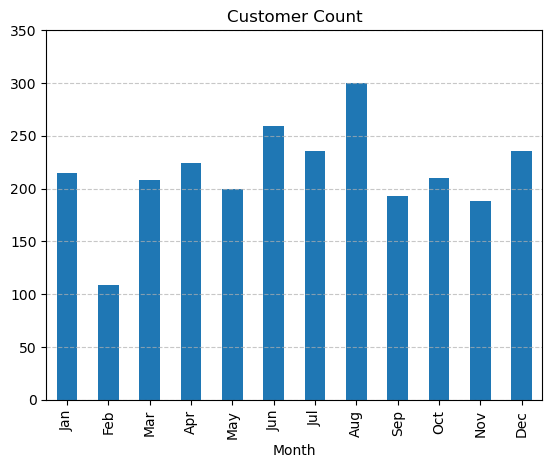

In [22]:
cust_count.plot(kind='bar',x='Month',y='Cust_Count', ylim=(0,350))
plt.title('Customer Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend().set_visible(False)
plt.show()

##### what if we had to look for "new" customers acquired every month

In [23]:
unique = df.groupby(['Year_Month','Month'])['CustomerID'].unique().reset_index()
unique['cust_count'] = unique.CustomerID.apply(len)
unique

,Year_Month,Month,CustomerID,cust_count
0,2019-01,Jan,"[17850, 13047, 12583, 15100, 14688, 15311, 160...",215
1,2019-02,Feb,"[17809, 15311, 14527, 13767, 12748, 14911, 178...",109
2,2019-03,Mar,"[15100, 17511, 17920, 16210, 17897, 12748, 169...",208
3,2019-04,Apr,"[15311, 14527, 15513, 15983, 17377, 12748, 124...",224
4,2019-05,May,"[15311, 13408, 13448, 15983, 12748, 17841, 146...",200
5,2019-06,Jun,"[15100, 14527, 16029, 12431, 17511, 13408, 137...",259
6,2019-07,Jul,"[15311, 14527, 17511, 13408, 13694, 17951, 127...",236
7,2019-08,Aug,"[12583, 15291, 15311, 13767, 18085, 13758, 136...",300
8,2019-09,Sep,"[14688, 15311, 14527, 16029, 14307, 12748, 149...",193
9,2019-10,Oct,"[15311, 14527, 16029, 13408, 14849, 14911, 178...",210


In [24]:
for i in range(len(unique.Month)):
    if i == 0:
        a = set(unique.CustomerID[i])
        unique.loc[i, 'new_cust'] = len(a)
        b = set()
    else:
        b = set(unique.CustomerID[i])
        unique.loc[i, 'new_cust'] = len(b.difference(a))
    a = a.union(b)

unique

,Year_Month,Month,CustomerID,cust_count,new_cust
0,2019-01,Jan,"[17850, 13047, 12583, 15100, 14688, 15311, 160...",215,215.0
1,2019-02,Feb,"[17809, 15311, 14527, 13767, 12748, 14911, 178...",109,96.0
2,2019-03,Mar,"[15100, 17511, 17920, 16210, 17897, 12748, 169...",208,177.0
3,2019-04,Apr,"[15311, 14527, 15513, 15983, 17377, 12748, 124...",224,163.0
4,2019-05,May,"[15311, 13408, 13448, 15983, 12748, 17841, 146...",200,112.0
5,2019-06,Jun,"[15100, 14527, 16029, 12431, 17511, 13408, 137...",259,137.0
6,2019-07,Jul,"[15311, 14527, 17511, 13408, 13694, 17951, 127...",236,94.0
7,2019-08,Aug,"[12583, 15291, 15311, 13767, 18085, 13758, 136...",300,135.0
8,2019-09,Sep,"[14688, 15311, 14527, 16029, 14307, 12748, 149...",193,78.0
9,2019-10,Oct,"[15311, 14527, 16029, 13408, 14849, 14911, 178...",210,87.0


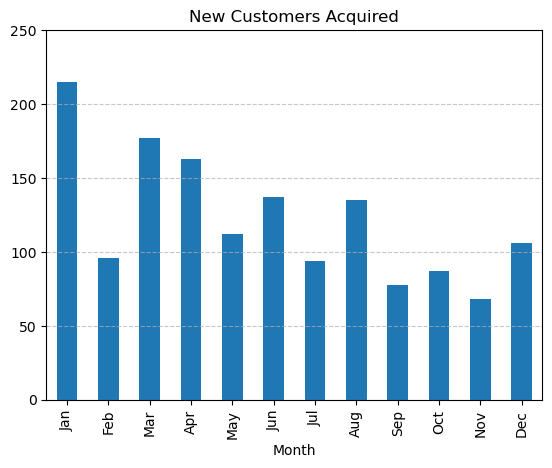

In [25]:
unique.plot(kind='bar',x='Month',y='new_cust', ylim=(0,250))
plt.title('New Customers Acquired')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend().set_visible(False)
plt.show()

#### b. Understand the retention of customers on month on month basis

In [26]:
unique['existing_cust'] = unique.CustomerID.apply(len) - unique.new_cust
unique

,Year_Month,Month,CustomerID,cust_count,new_cust,existing_cust
0,2019-01,Jan,"[17850, 13047, 12583, 15100, 14688, 15311, 160...",215,215.0,0.0
1,2019-02,Feb,"[17809, 15311, 14527, 13767, 12748, 14911, 178...",109,96.0,13.0
2,2019-03,Mar,"[15100, 17511, 17920, 16210, 17897, 12748, 169...",208,177.0,31.0
3,2019-04,Apr,"[15311, 14527, 15513, 15983, 17377, 12748, 124...",224,163.0,61.0
4,2019-05,May,"[15311, 13408, 13448, 15983, 12748, 17841, 146...",200,112.0,88.0
5,2019-06,Jun,"[15100, 14527, 16029, 12431, 17511, 13408, 137...",259,137.0,122.0
6,2019-07,Jul,"[15311, 14527, 17511, 13408, 13694, 17951, 127...",236,94.0,142.0
7,2019-08,Aug,"[12583, 15291, 15311, 13767, 18085, 13758, 136...",300,135.0,165.0
8,2019-09,Sep,"[14688, 15311, 14527, 16029, 14307, 12748, 149...",193,78.0,115.0
9,2019-10,Oct,"[15311, 14527, 16029, 13408, 14849, 14911, 178...",210,87.0,123.0


In [27]:
unique['new_cust_%'] = round(unique.new_cust/unique.cust_count*100,1)
unique['existing_cust_%'] = round(unique.existing_cust/unique.cust_count*100,1)
unique

,Year_Month,Month,CustomerID,cust_count,new_cust,existing_cust,new_cust_%,existing_cust_%
0,2019-01,Jan,"[17850, 13047, 12583, 15100, 14688, 15311, 160...",215,215.0,0.0,100.0,0.0
1,2019-02,Feb,"[17809, 15311, 14527, 13767, 12748, 14911, 178...",109,96.0,13.0,88.1,11.9
2,2019-03,Mar,"[15100, 17511, 17920, 16210, 17897, 12748, 169...",208,177.0,31.0,85.1,14.9
3,2019-04,Apr,"[15311, 14527, 15513, 15983, 17377, 12748, 124...",224,163.0,61.0,72.8,27.2
4,2019-05,May,"[15311, 13408, 13448, 15983, 12748, 17841, 146...",200,112.0,88.0,56.0,44.0
5,2019-06,Jun,"[15100, 14527, 16029, 12431, 17511, 13408, 137...",259,137.0,122.0,52.9,47.1
6,2019-07,Jul,"[15311, 14527, 17511, 13408, 13694, 17951, 127...",236,94.0,142.0,39.8,60.2
7,2019-08,Aug,"[12583, 15291, 15311, 13767, 18085, 13758, 136...",300,135.0,165.0,45.0,55.0
8,2019-09,Sep,"[14688, 15311, 14527, 16029, 14307, 12748, 149...",193,78.0,115.0,40.4,59.6
9,2019-10,Oct,"[15311, 14527, 16029, 13408, 14849, 14911, 178...",210,87.0,123.0,41.4,58.6


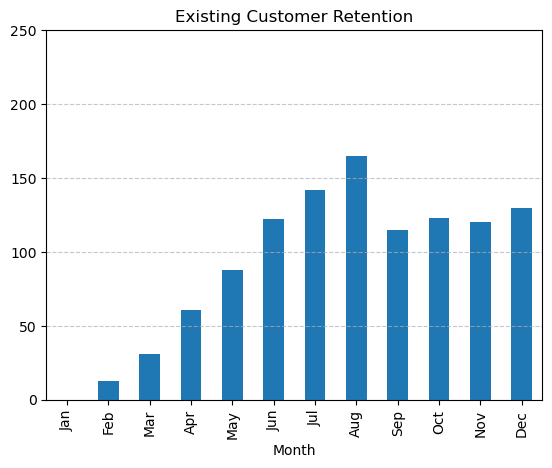

In [28]:
unique.plot(kind='bar',x='Month',y='existing_cust', ylim=(0,250))
plt.title('Existing Customer Retention')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend().set_visible(False)
plt.show()

##### Understanding Customers holistically

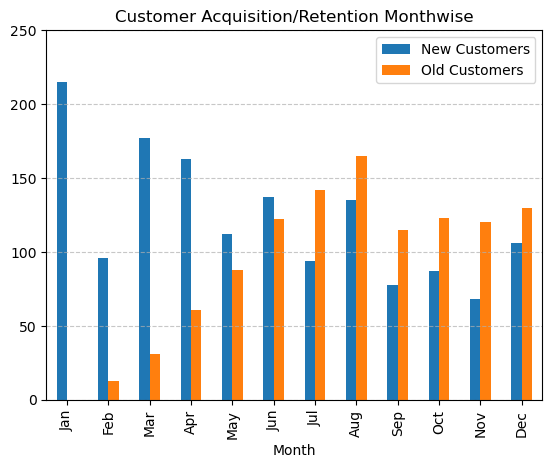

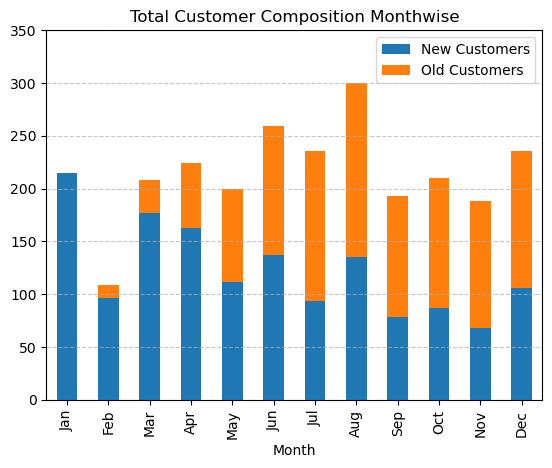

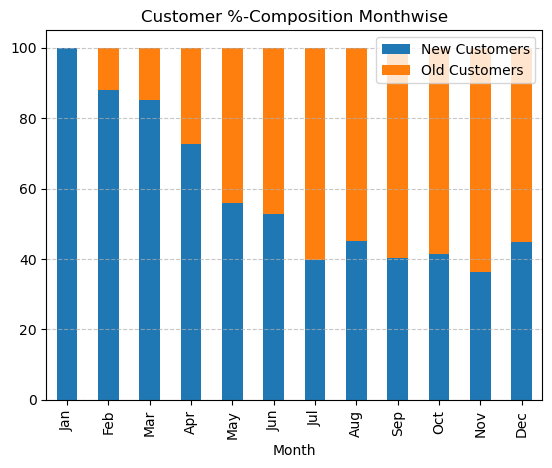

In [29]:
unique.plot(kind='bar', x='Month',y=['new_cust', 'existing_cust'], ylim=(0,250))
plt.title('Customer Acquisition/Retention Monthwise')
plt.legend(['New Customers', 'Old Customers'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

unique.plot(kind='bar', x='Month',y=['new_cust', 'existing_cust'], ylim=(0,350), stacked=True)
plt.title('Total Customer Composition Monthwise')
plt.legend(['New Customers', 'Old Customers'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

unique.plot(kind='bar', x='Month',y=['new_cust_%', 'existing_cust_%'], stacked=True)
plt.title('Customer %-Composition Monthwise')
plt.legend(['New Customers', 'Old Customers'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

#### c. How the revenues from existing/new customers on month on month basis

In [30]:
cust_rev = invoice.groupby('CustomerID')['Invoice_Value'].sum().reset_index()
cust_rev.head()

,CustomerID,Invoice_Value
0,12346,174.98174
1,12347,15686.84396
2,12348,1689.55594
3,12350,1467.43528
4,12356,2007.42900


In [31]:
for i in range(len(unique.Month)):
    if i == 0:
        a = set(unique.CustomerID[i])
        b = set()
        rev = 0
        for j in list(a):
            rev = rev + cust_rev.loc[cust_rev.CustomerID == j,'Invoice_Value'].iloc[0]
        unique.loc[i, 'new_cust_rev'] = round(rev,2)        
    else:
        b = set(unique.CustomerID[i])
        rev = 0
        for j in list(b.difference(a)):
            rev = rev + cust_rev.loc[cust_rev.CustomerID == j,'Invoice_Value'].iloc[0]
        unique.loc[i, 'new_cust_rev'] = round(rev,2)
    a = a.union(b)
    
unique

,Year_Month,Month,CustomerID,cust_count,new_cust,existing_cust,new_cust_%,existing_cust_%,new_cust_rev
0,2019-01,Jan,"[17850, 13047, 12583, 15100, 14688, 15311, 160...",215,215.0,0.0,100.0,0.0,1227511.26
1,2019-02,Feb,"[17809, 15311, 14527, 13767, 12748, 14911, 178...",109,96.0,13.0,88.1,11.9,636073.09
2,2019-03,Mar,"[15100, 17511, 17920, 16210, 17897, 12748, 169...",208,177.0,31.0,85.1,14.9,769307.02
3,2019-04,Apr,"[15311, 14527, 15513, 15983, 17377, 12748, 124...",224,163.0,61.0,72.8,27.2,523464.52
4,2019-05,May,"[15311, 13408, 13448, 15983, 12748, 17841, 146...",200,112.0,88.0,56.0,44.0,386306.89
5,2019-06,Jun,"[15100, 14527, 16029, 12431, 17511, 13408, 137...",259,137.0,122.0,52.9,47.1,332681.57
6,2019-07,Jul,"[15311, 14527, 17511, 13408, 13694, 17951, 127...",236,94.0,142.0,39.8,60.2,277810.47
7,2019-08,Aug,"[12583, 15291, 15311, 13767, 18085, 13758, 136...",300,135.0,165.0,45.0,55.0,302180.10
8,2019-09,Sep,"[14688, 15311, 14527, 16029, 14307, 12748, 149...",193,78.0,115.0,40.4,59.6,168107.79
9,2019-10,Oct,"[15311, 14527, 16029, 13408, 14849, 14911, 178...",210,87.0,123.0,41.4,58.6,270950.23


In [32]:
for i in range(len(unique.Month)):
    unique.loc[i, 'existing_cust_rev'] = round(sum([cust_rev.loc[cust_rev.CustomerID == j,'Invoice_Value'].iloc[0] for j in unique.CustomerID[i]]) - unique.new_cust_rev[i], 2)
unique

,Year_Month,Month,CustomerID,cust_count,new_cust,existing_cust,new_cust_%,existing_cust_%,new_cust_rev,existing_cust_rev
0,2019-01,Jan,"[17850, 13047, 12583, 15100, 14688, 15311, 160...",215,215.0,0.0,100.0,0.0,1227511.26,-0.00
1,2019-02,Feb,"[17809, 15311, 14527, 13767, 12748, 14911, 178...",109,96.0,13.0,88.1,11.9,636073.09,414708.98
2,2019-03,Mar,"[15100, 17511, 17920, 16210, 17897, 12748, 169...",208,177.0,31.0,85.1,14.9,769307.02,480904.08
3,2019-04,Apr,"[15311, 14527, 15513, 15983, 17377, 12748, 124...",224,163.0,61.0,72.8,27.2,523464.52,673996.97
4,2019-05,May,"[15311, 13408, 13448, 15983, 12748, 17841, 146...",200,112.0,88.0,56.0,44.0,386306.89,938120.56
5,2019-06,Jun,"[15100, 14527, 16029, 12431, 17511, 13408, 137...",259,137.0,122.0,52.9,47.1,332681.57,1043856.52
6,2019-07,Jul,"[15311, 14527, 17511, 13408, 13694, 17951, 127...",236,94.0,142.0,39.8,60.2,277810.47,1317146.16
7,2019-08,Aug,"[12583, 15291, 15311, 13767, 18085, 13758, 136...",300,135.0,165.0,45.0,55.0,302180.10,1232943.06
8,2019-09,Sep,"[14688, 15311, 14527, 16029, 14307, 12748, 149...",193,78.0,115.0,40.4,59.6,168107.79,1106354.61
9,2019-10,Oct,"[15311, 14527, 16029, 13408, 14849, 14911, 178...",210,87.0,123.0,41.4,58.6,270950.23,1000490.01


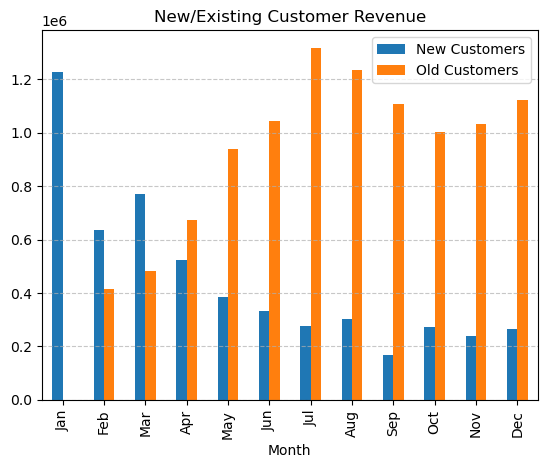

In [33]:
unique.plot(kind='bar',x='Month', y=['new_cust_rev','existing_cust_rev'])
plt.title('New/Existing Customer Revenue')
plt.legend(['New Customers', 'Old Customers'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### d. How are the discounts playing role in the revenues?

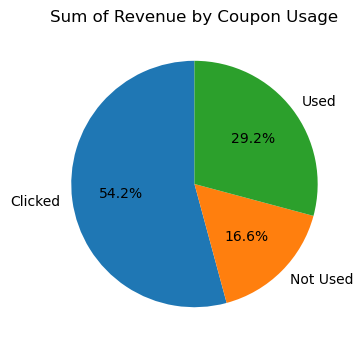

In [34]:
grouped = invoice.groupby('Coupon_Status')['Invoice_Value'].sum()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)

plt.title('Sum of Revenue by Coupon Usage')

plt.show()

##### Let's check role of discounts in Top10 categories

In [35]:
top10 = (invoice.groupby('Product_Category')['Invoice_Value'].sum()
         .round(2)
         .sort_values(ascending=False)
         .reset_index()
         .head(10))
top10

,Product_Category,Invoice_Value
0,Nest-USA,2721645.76
1,Apparel,827829.21
2,Nest,520653.67
3,Office,381945.27
4,Drinkware,272621.96
5,Bags,193626.61
6,Lifestyle,125276.00
7,Notebooks & Journals,122419.32
8,Nest-Canada,76245.76
9,Headgear,57861.49


In [37]:
disc_data = invoice.loc[invoice.Product_Category.isin(top10.Product_Category),['Product_Category','Coupon_Status','Coupon_Code','Invoice_Value']]
disc_data.head()

,Product_Category,Coupon_Status,Coupon_Code,Invoice_Value
0,Nest-USA,Used,ELEC10,158.6729
1,Nest-USA,Used,ELEC10,158.6729
2,Nest-USA,Not Used,ELEC10,276.5940
3,Nest-USA,Clicked,ELEC10,96.1500
4,Nest-USA,Clicked,ELEC10,175.5810


In [38]:
disc_used = disc_data.groupby(['Product_Category','Coupon_Status'])['Invoice_Value'].sum().round(2).reset_index()
disc_used

,Product_Category,Coupon_Status,Invoice_Value
0,Apparel,Clicked,447885.85
1,Apparel,Not Used,139390.56
2,Apparel,Used,240552.79
3,Bags,Clicked,109744.33
4,Bags,Not Used,33458.53
5,Bags,Used,50423.75
6,Drinkware,Clicked,147745.67
7,Drinkware,Not Used,49056.56
8,Drinkware,Used,75819.74
9,Headgear,Clicked,20901.16


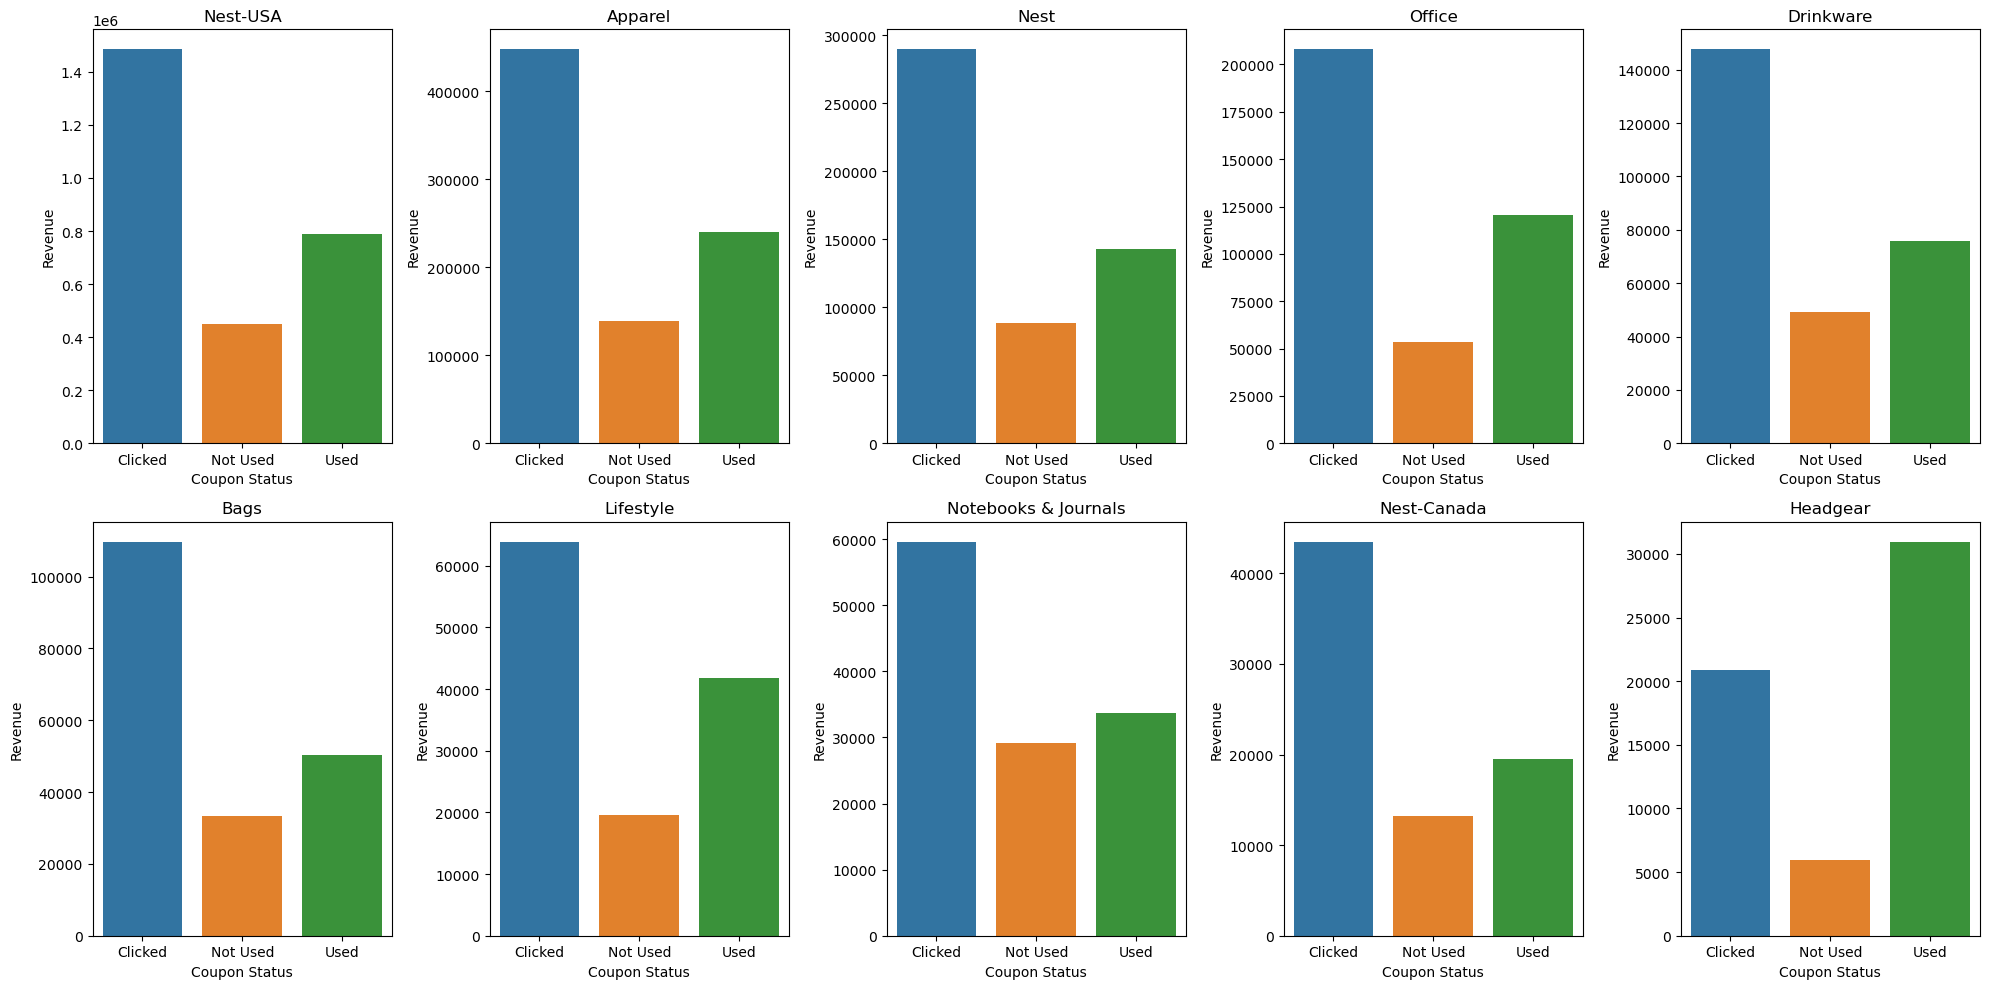

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for i, category in enumerate(top10['Product_Category'].unique()[:10]):     # Using top10, to display subplots in decreasing order of revenue contribution
    ax = axes.flatten()[i]
    
    category_data = disc_used[disc_used['Product_Category'] == category]
    grouped_data = category_data.groupby('Coupon_Status')['Invoice_Value'].sum().reset_index()
    sns.barplot(x='Coupon_Status', y='Invoice_Value', data=grouped_data, ax=ax)
    
    ax.set_title(category)
    ax.set_xlabel('Coupon Status')
    ax.set_ylabel('Revenue')
    
plt.tight_layout()
plt.show()

##### Types of coupon used

In [41]:
coupon_used = disc_data[disc_data.Coupon_Status == 'Used']
coupon_used.head()

,Product_Category,Coupon_Status,Coupon_Code,Invoice_Value
0,Nest-USA,Used,ELEC10,158.6729
1,Nest-USA,Used,ELEC10,158.6729
8,Nest-USA,Used,ELEC10,260.8112
10,Nest-USA,Used,ELEC10,128.0423
12,Nest-USA,Used,ELEC10,158.6729


In [42]:
coupon_used.Product_Category.nunique()

10

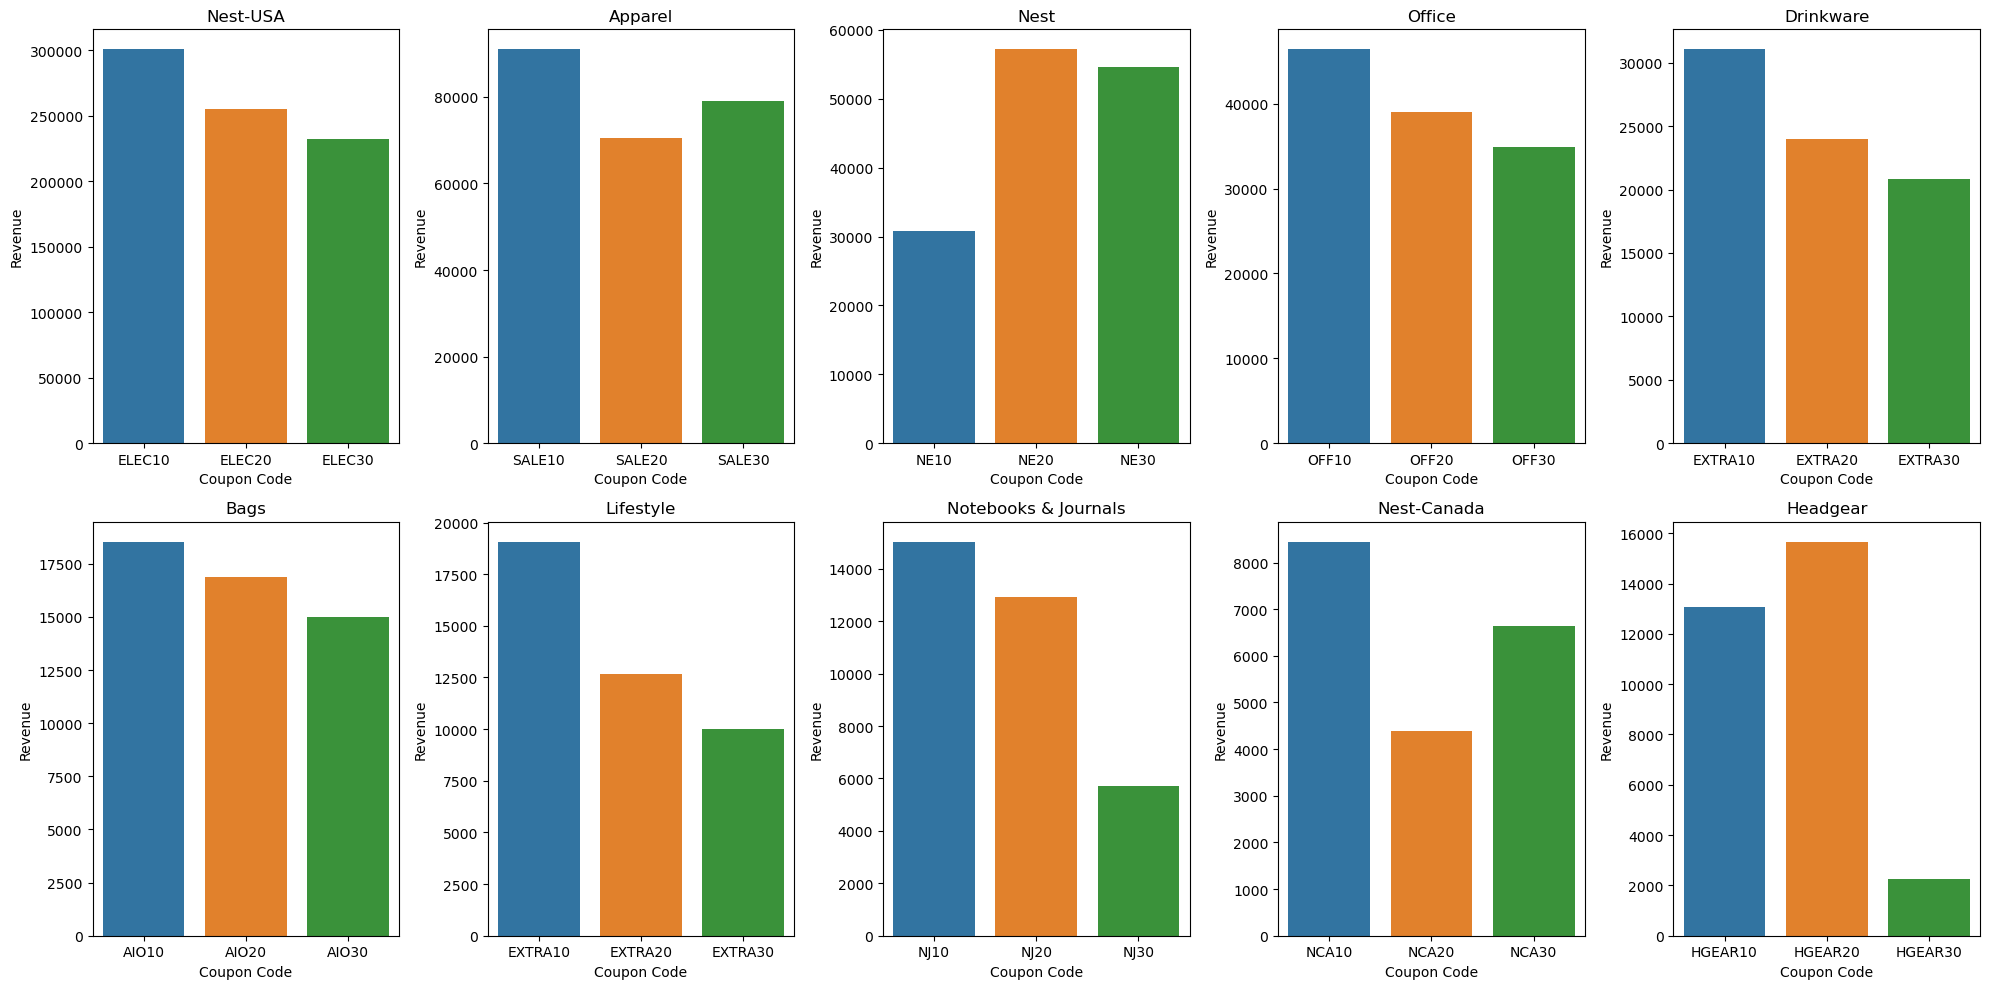

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for i, category in enumerate(top10['Product_Category'].unique()[:10]):     # Using top10, to display subplots in decreasing order of revenue contribution
    ax = axes.flatten()[i]
    
    category_data = coupon_used[coupon_used['Product_Category'] == category]
    grouped_data = category_data.groupby('Coupon_Code')['Invoice_Value'].sum().reset_index()
    sns.barplot(x='Coupon_Code', y='Invoice_Value', data=grouped_data, ax=ax)
    
    ax.set_title(category)
    ax.set_xlabel('Coupon Code')
    ax.set_ylabel('Revenue')
    
plt.tight_layout()
plt.show()

### e. Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

##### Category-wise

In [44]:
cat_data = (invoice.groupby('Product_Category')
            .agg({'Invoice_Value':'sum', 'Transaction_ID':'count','Quantity':'sum','CustomerID':'nunique'})
            .reset_index()
            .rename(columns={'Transaction_ID':'Orders','CustomerID':'Customers'})
           )
cat_data['Invoice_Value'] = cat_data['Invoice_Value'].round(2)
cat_data.insert(3,'AoV',cat_data.Invoice_Value/cat_data.Orders)
cat_data.sort_values(by='Invoice_Value', ascending=False)

,Product_Category,Invoice_Value,Orders,AoV,Quantity,Customers
16,Nest-USA,2721645.76,14013,194.222919,21430,1260
2,Apparel,827829.21,18126,45.670816,32438,1323
14,Nest,520653.67,2198,236.876101,2837,516
18,Office,381945.27,6513,58.643524,88383,1103
6,Drinkware,272621.96,3483,78.272168,30501,919
4,Bags,193626.61,1882,102.883427,15273,728
12,Lifestyle,125276.00,3092,40.516171,24881,817
17,Notebooks & Journals,122419.32,749,163.443685,9556,383
15,Nest-Canada,76245.76,317,240.522902,469,205
10,Headgear,57861.49,771,75.047328,3533,425


##### Month-wise

In [45]:
month_data = (invoice.groupby(invoice.Transaction_Date.dt.month)
            .agg({'Invoice_Value':'sum', 'Transaction_ID':'count', 'Quantity':'sum','CustomerID':'nunique'})
            .reset_index()
            .rename(columns={'Transaction_Date':'Month', 'Transaction_ID':'Orders','CustomerID':'Customers'})
           )
month_data['Invoice_Value'] = month_data['Invoice_Value'].round(2)
month_data.insert(3,'AoV',month_data.Invoice_Value/month_data.Orders)
month_data

,Month,Invoice_Value,Orders,AoV,Quantity,Customers
0,1,494090.55,4063,121.607322,20140,215
1,2,375162.05,3284,114.239357,16575,109
2,3,415157.79,4346,95.526413,20787,208
3,4,477498.59,4150,115.059901,25277,224
4,5,365596.03,4572,79.964136,18715,200
5,6,361000.17,4193,86.095915,21619,259
6,7,451878.41,5251,86.055687,22898,236
7,8,475796.88,6150,77.365346,27457,300
8,9,396510.49,4288,92.469797,19353,193
9,10,480767.37,4164,115.458062,17425,210


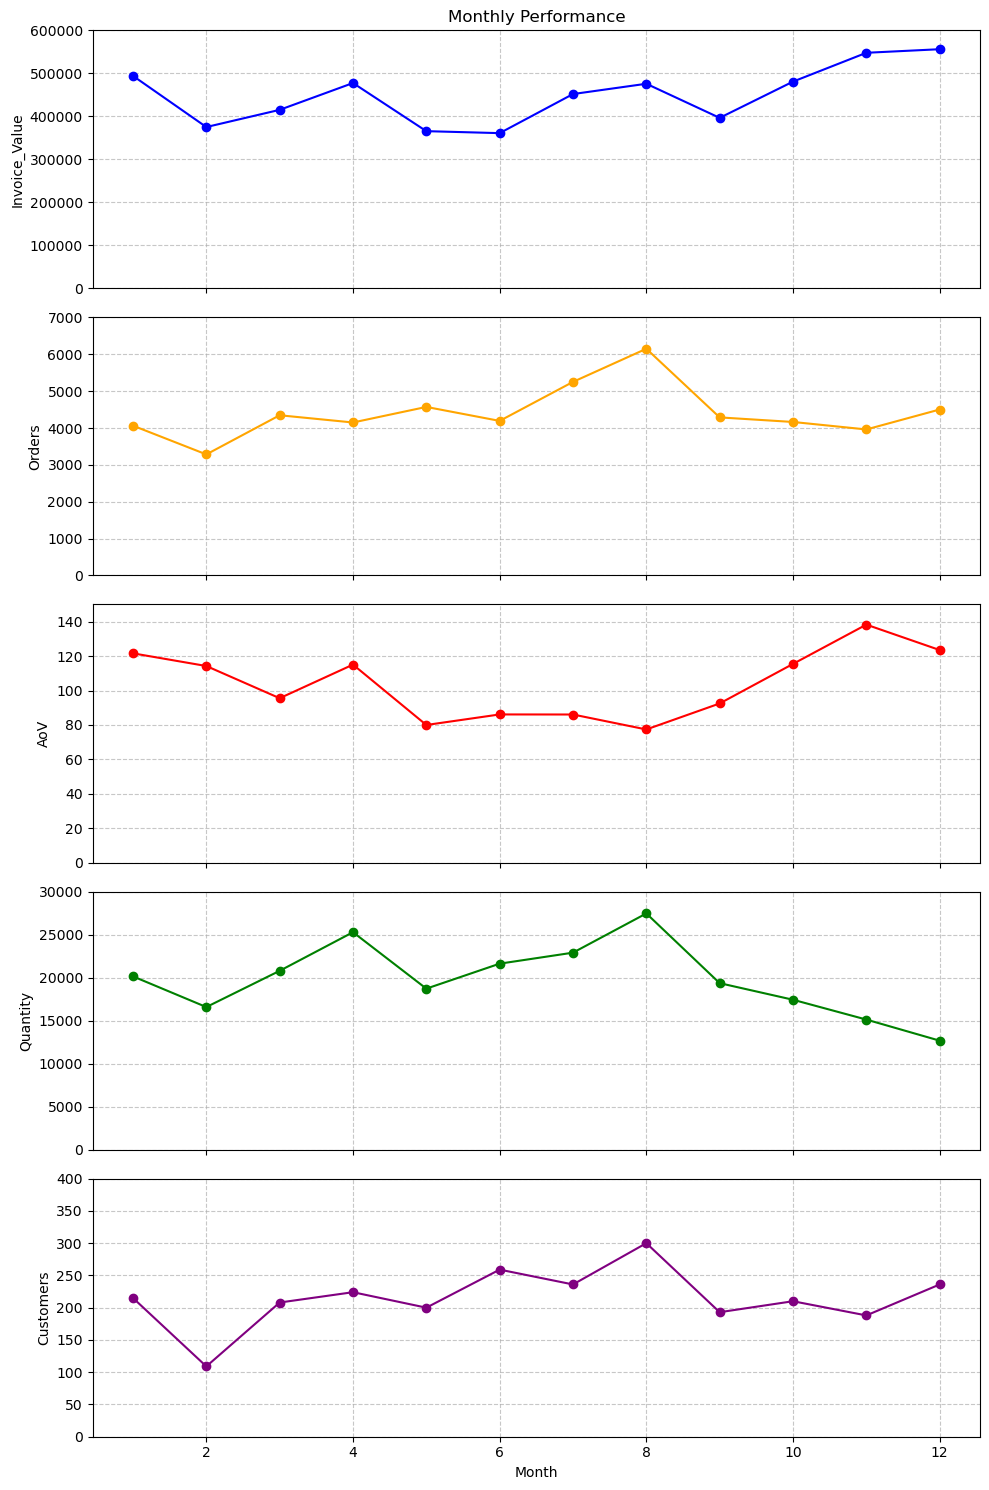

In [46]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15), sharex=True)

# Plot Revenue
axes[0].plot(month_data.Month, month_data.Invoice_Value, marker='o', color='b')
axes[0].set_ylim(0, 600000)
axes[0].set_ylabel('Invoice_Value')
axes[0].set_title('Monthly Performance')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot Orders
axes[1].plot(month_data.Month, month_data.Orders, marker='o', color='orange')
axes[1].set_ylim(0, 7000)
axes[1].set_ylabel('Orders')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot AoV
axes[2].plot(month_data.Month, month_data.AoV, marker='o', color='r')
axes[2].set_ylim(0, 150)
axes[2].set_ylabel('AoV')
axes[2].grid(True, linestyle='--', alpha=0.7)

# Plot Quantity
axes[3].plot(month_data.Month, month_data.Quantity, marker='o', color='g')
axes[3].set_ylim(0, 30000)
axes[3].set_ylabel('Quantity')
axes[3].grid(True, linestyle='--', alpha=0.7)

# Plot Customers
axes[4].plot(month_data.Month, month_data.Customers, marker='o', color='purple')
axes[4].set_ylim(0, 400)
axes[4].set_ylabel('Customers')
axes[4].set_xlabel('Month')
axes[4].grid(True, linestyle='--', alpha=0.7)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
week_data = (invoice.groupby(invoice.Transaction_Date.dt.week)
            .agg({'Invoice_Value':'sum', 'Transaction_ID':'count', 'Quantity':'sum','CustomerID':'nunique'})
            .reset_index()
            .rename(columns={'Transaction_Date':'Week_No', 'Transaction_ID':'Orders','CustomerID':'Customers'})
           )
week_data['Invoice_Value'] = week_data['Invoice_Value'].round(2)
week_data.insert(3,'AoV',week_data.Invoice_Value/week_data.Orders)
week_data.head()

C:\Users\singh\AppData\Local\Temp\ipykernel_14404\1006522116.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_data = (invoice.groupby(invoice.Transaction_Date.dt.week)


,Week_No,Invoice_Value,Orders,AoV,Quantity,Customers
0,1,131077.88,1056,124.126780,5964,53
1,2,104569.21,829,126.138975,4665,43
2,3,106868.31,842,126.921983,4319,48
3,4,109560.62,943,116.183054,3074,45
4,5,105695.03,926,114.141501,4317,64


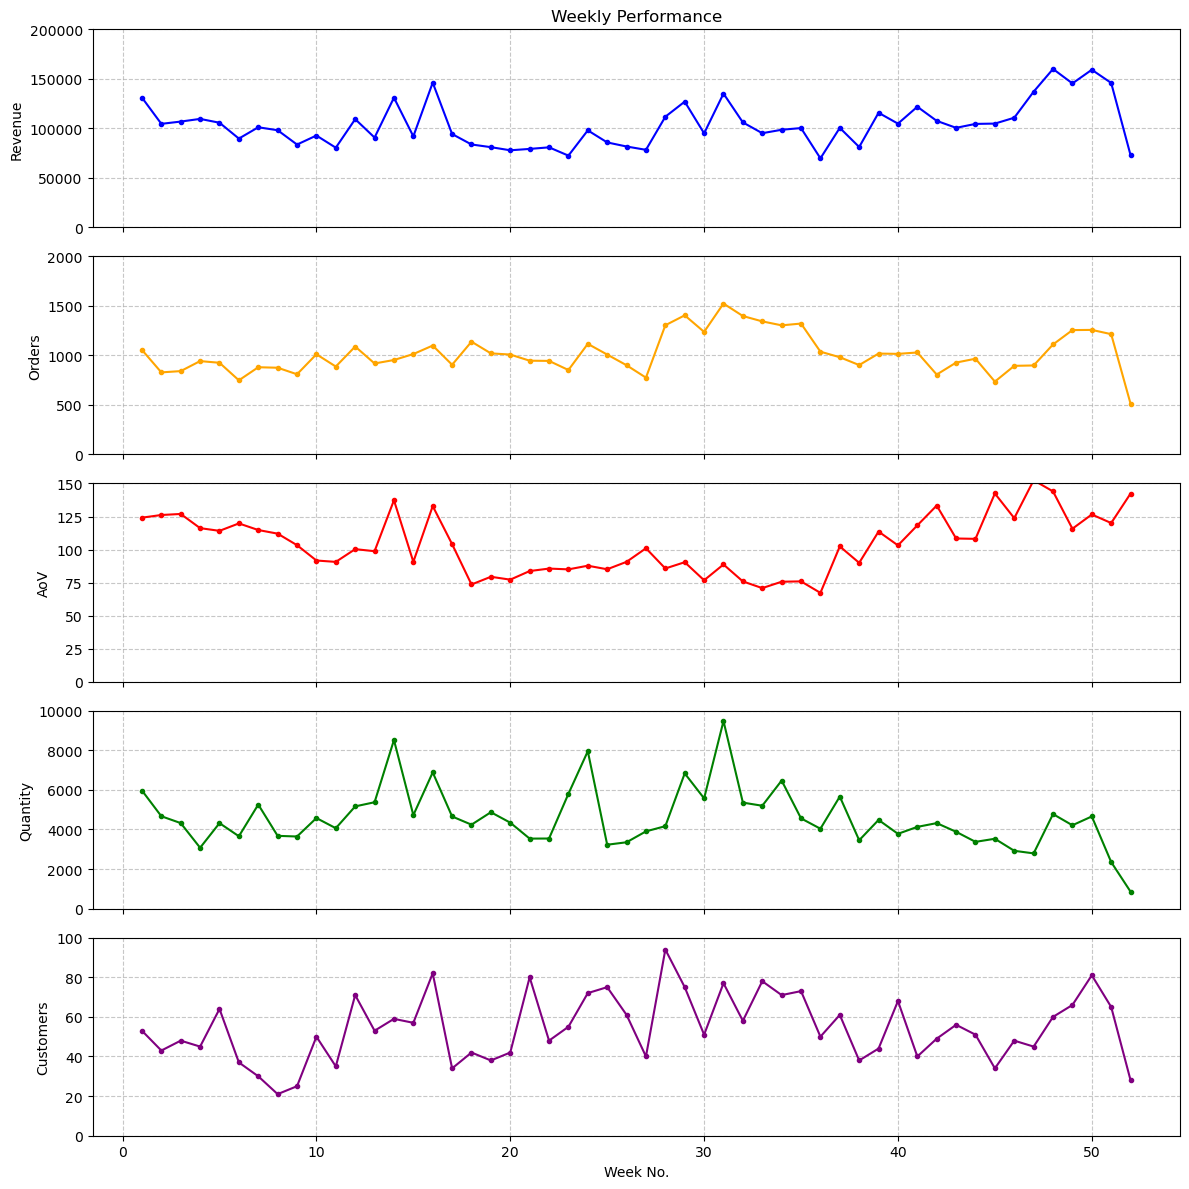

In [48]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 12), sharex=True)

# Plot Revenue
axes[0].plot(week_data.Week_No, week_data.Invoice_Value, marker='.', color='b')
axes[0].set_ylim(0, 200000)
axes[0].set_ylabel('Revenue')
axes[0].set_title('Weekly Performance')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot Orders
axes[1].plot(week_data.Week_No, week_data.Orders, marker='.', color='orange')
axes[1].set_ylim(0, 2000)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_ylabel('Orders')

# Plot AoV
axes[2].plot(week_data.Week_No, week_data.AoV, marker='.', color='r')
axes[2].set_ylim(0, 150)
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].set_ylabel('AoV')

# Plot Quantity
axes[3].plot(week_data.Week_No, week_data.Quantity, marker='.', color='g')
axes[3].set_ylim(0, 10000)
axes[3].grid(True, linestyle='--', alpha=0.7)
axes[3].set_ylabel('Quantity')

# Plot Customers
axes[4].plot(week_data.Week_No, week_data.Customers, marker='.', color='purple')
axes[4].set_ylim(0, 100)
axes[4].grid(True, linestyle='--', alpha=0.7)
axes[4].set_ylabel('Customers')
axes[4].set_xlabel('Week No.')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [49]:
day_data = (invoice.groupby([invoice.Transaction_Date.dt.weekday])
            .agg({'Invoice_Value':'sum', 'Transaction_ID':'count', 'Quantity':'sum','CustomerID':'nunique'})
            .reset_index()
            .rename(columns={'Transaction_Date':'Day_No', 'Transaction_ID':'Orders','CustomerID':'Customers'})
           )
day_data['Invoice_Value'] = day_data['Invoice_Value'].round(2)
day_data.insert(3,'AoV',day_data.Invoice_Value/day_data.Orders)
day_data

,Day_No,Invoice_Value,Orders,AoV,Quantity,Customers
0,0,412681.89,4464,92.446660,11983,258
1,1,450233.69,4611,97.643394,11317,274
2,2,956308.44,8887,107.607566,39797,433
3,3,974511.96,9000,108.279107,44482,445
4,4,998722.69,9266,107.783584,52433,474
5,5,791133.56,8177,96.751077,37965,400
6,6,813766.51,8519,95.523713,40056,390


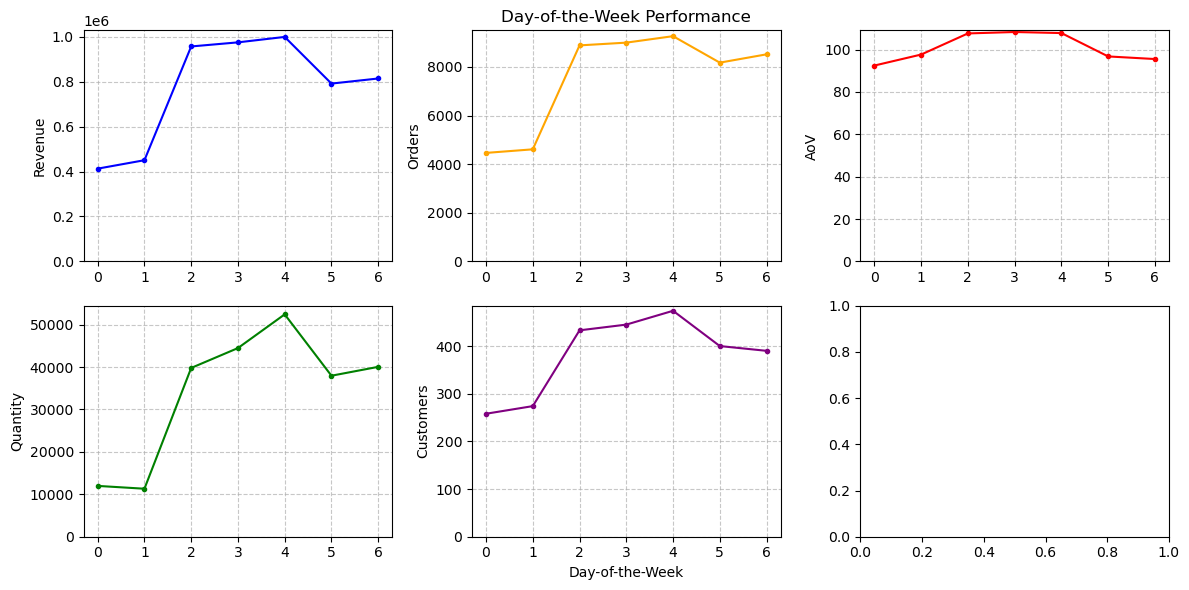

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Plot Revenue
axes[0,0].plot(day_data.Day_No, day_data.Invoice_Value, marker='.', color='b')
axes[0,0].set_ylim(0, axes[0,0].get_ylim()[1])
axes[0,0].grid(True, linestyle='--', alpha=0.7)
axes[0,0].set_ylabel('Revenue')

# Plot Orders
axes[0,1].plot(day_data.Day_No, day_data.Orders, marker='.', color='orange')
axes[0,1].set_ylim(0, axes[0,1].get_ylim()[1])
axes[0,1].grid(True, linestyle='--', alpha=0.7)
axes[0,1].set_ylabel('Orders')
axes[0,1].set_title('Day-of-the-Week Performance')

# Plot AoV
axes[0,2].plot(day_data.Day_No, day_data.AoV, marker='.', color='r')
axes[0,2].set_ylim(0, axes[0,2].get_ylim()[1])
axes[0,2].grid(True, linestyle='--', alpha=0.7)
axes[0,2].set_ylabel('AoV')

# Plot Quantity
axes[1,0].plot(day_data.Day_No, day_data.Quantity, marker='.', color='g')
axes[1,0].set_ylim(0, axes[1,0].get_ylim()[1])
axes[1,0].grid(True, linestyle='--', alpha=0.7)
axes[1,0].set_ylabel('Quantity')

# Plot Customers
axes[1,1].plot(day_data.Day_No, day_data.Customers, marker='.', color='purple')
axes[1,1].set_ylim(0, axes[1,1].get_ylim()[1])
axes[1,1].grid(True, linestyle='--', alpha=0.7)
axes[1,1].set_ylabel('Customers')
axes[1,1].set_xlabel('Day-of-the-Week')

plt.tight_layout()
plt.show()

### f. Understand the trends/seasonality of sales by category, location, month etc…

##### Sales of Categories by Month

In [58]:
cat_trend = (invoice.groupby([invoice.Transaction_Date.dt.month, 'Month','Product_Category'])['Invoice_Value'].sum()
             .round(2)
             .reset_index()
             .rename(columns={'Month':'Month_Name','Transaction_Date':'Month'}))
cat_trend = cat_trend[cat_trend.Product_Category.isin(top10.Product_Category)].sort_values(by=['Month','Invoice_Value'], ascending=[True, False])
cat_trend.head()

,Month,Month_Name,Product_Category,Invoice_Value
15,1,Jan,Nest-USA,313029.09
2,1,Jan,Apparel,59198.56
17,1,Jan,Office,44931.41
6,1,Jan,Drinkware,21144.00
4,1,Jan,Bags,15655.28


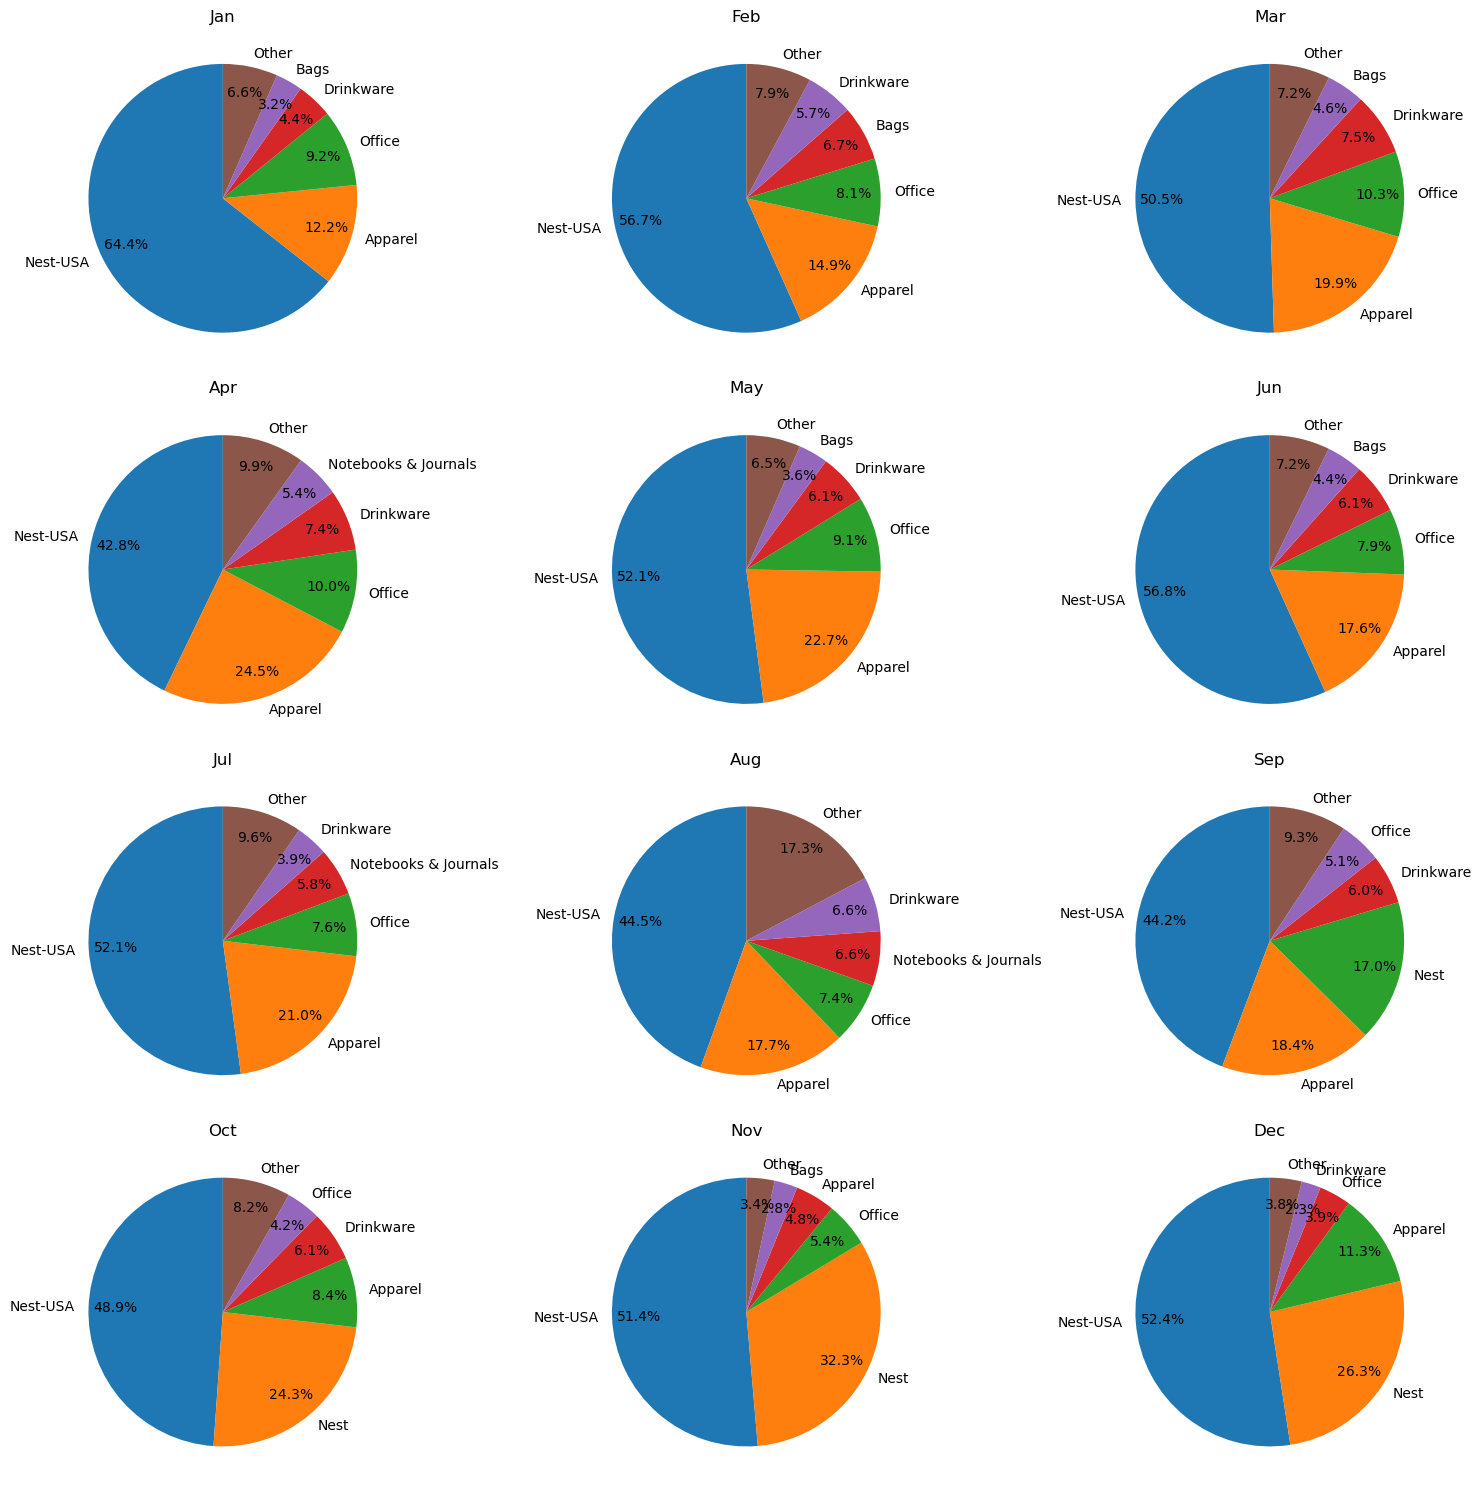

In [59]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

axes = axes.flatten()

top5_cats = pd.DataFrame(columns=cat_trend.columns)
for i in cat_trend.Month.unique():
    month_cat = cat_trend[cat_trend.Month==i]
    other = month_cat.tail(month_cat.shape[0]-5)
    new_row = {cat_trend.columns[0]:i, cat_trend.columns[1]:month_cat.Month, cat_trend.columns[2]:'Other', cat_trend.columns[3]:other.Invoice_Value.sum()}
    top5 = pd.concat([month_cat.head(5), pd.DataFrame([new_row])], ignore_index=True)
    
    ax = axes[i-1]
    ax.pie(top5['Invoice_Value'], labels=top5['Product_Category'], autopct='%1.1f%%', startangle=90, pctdistance=.8)
    ax.set_title(month_cat.Month_Name.unique()[0])
    
    top5_cats = pd.concat([top5_cats,top5], ignore_index=True)
plt.tight_layout()
plt.show()

##### Sales of Top10 Categories

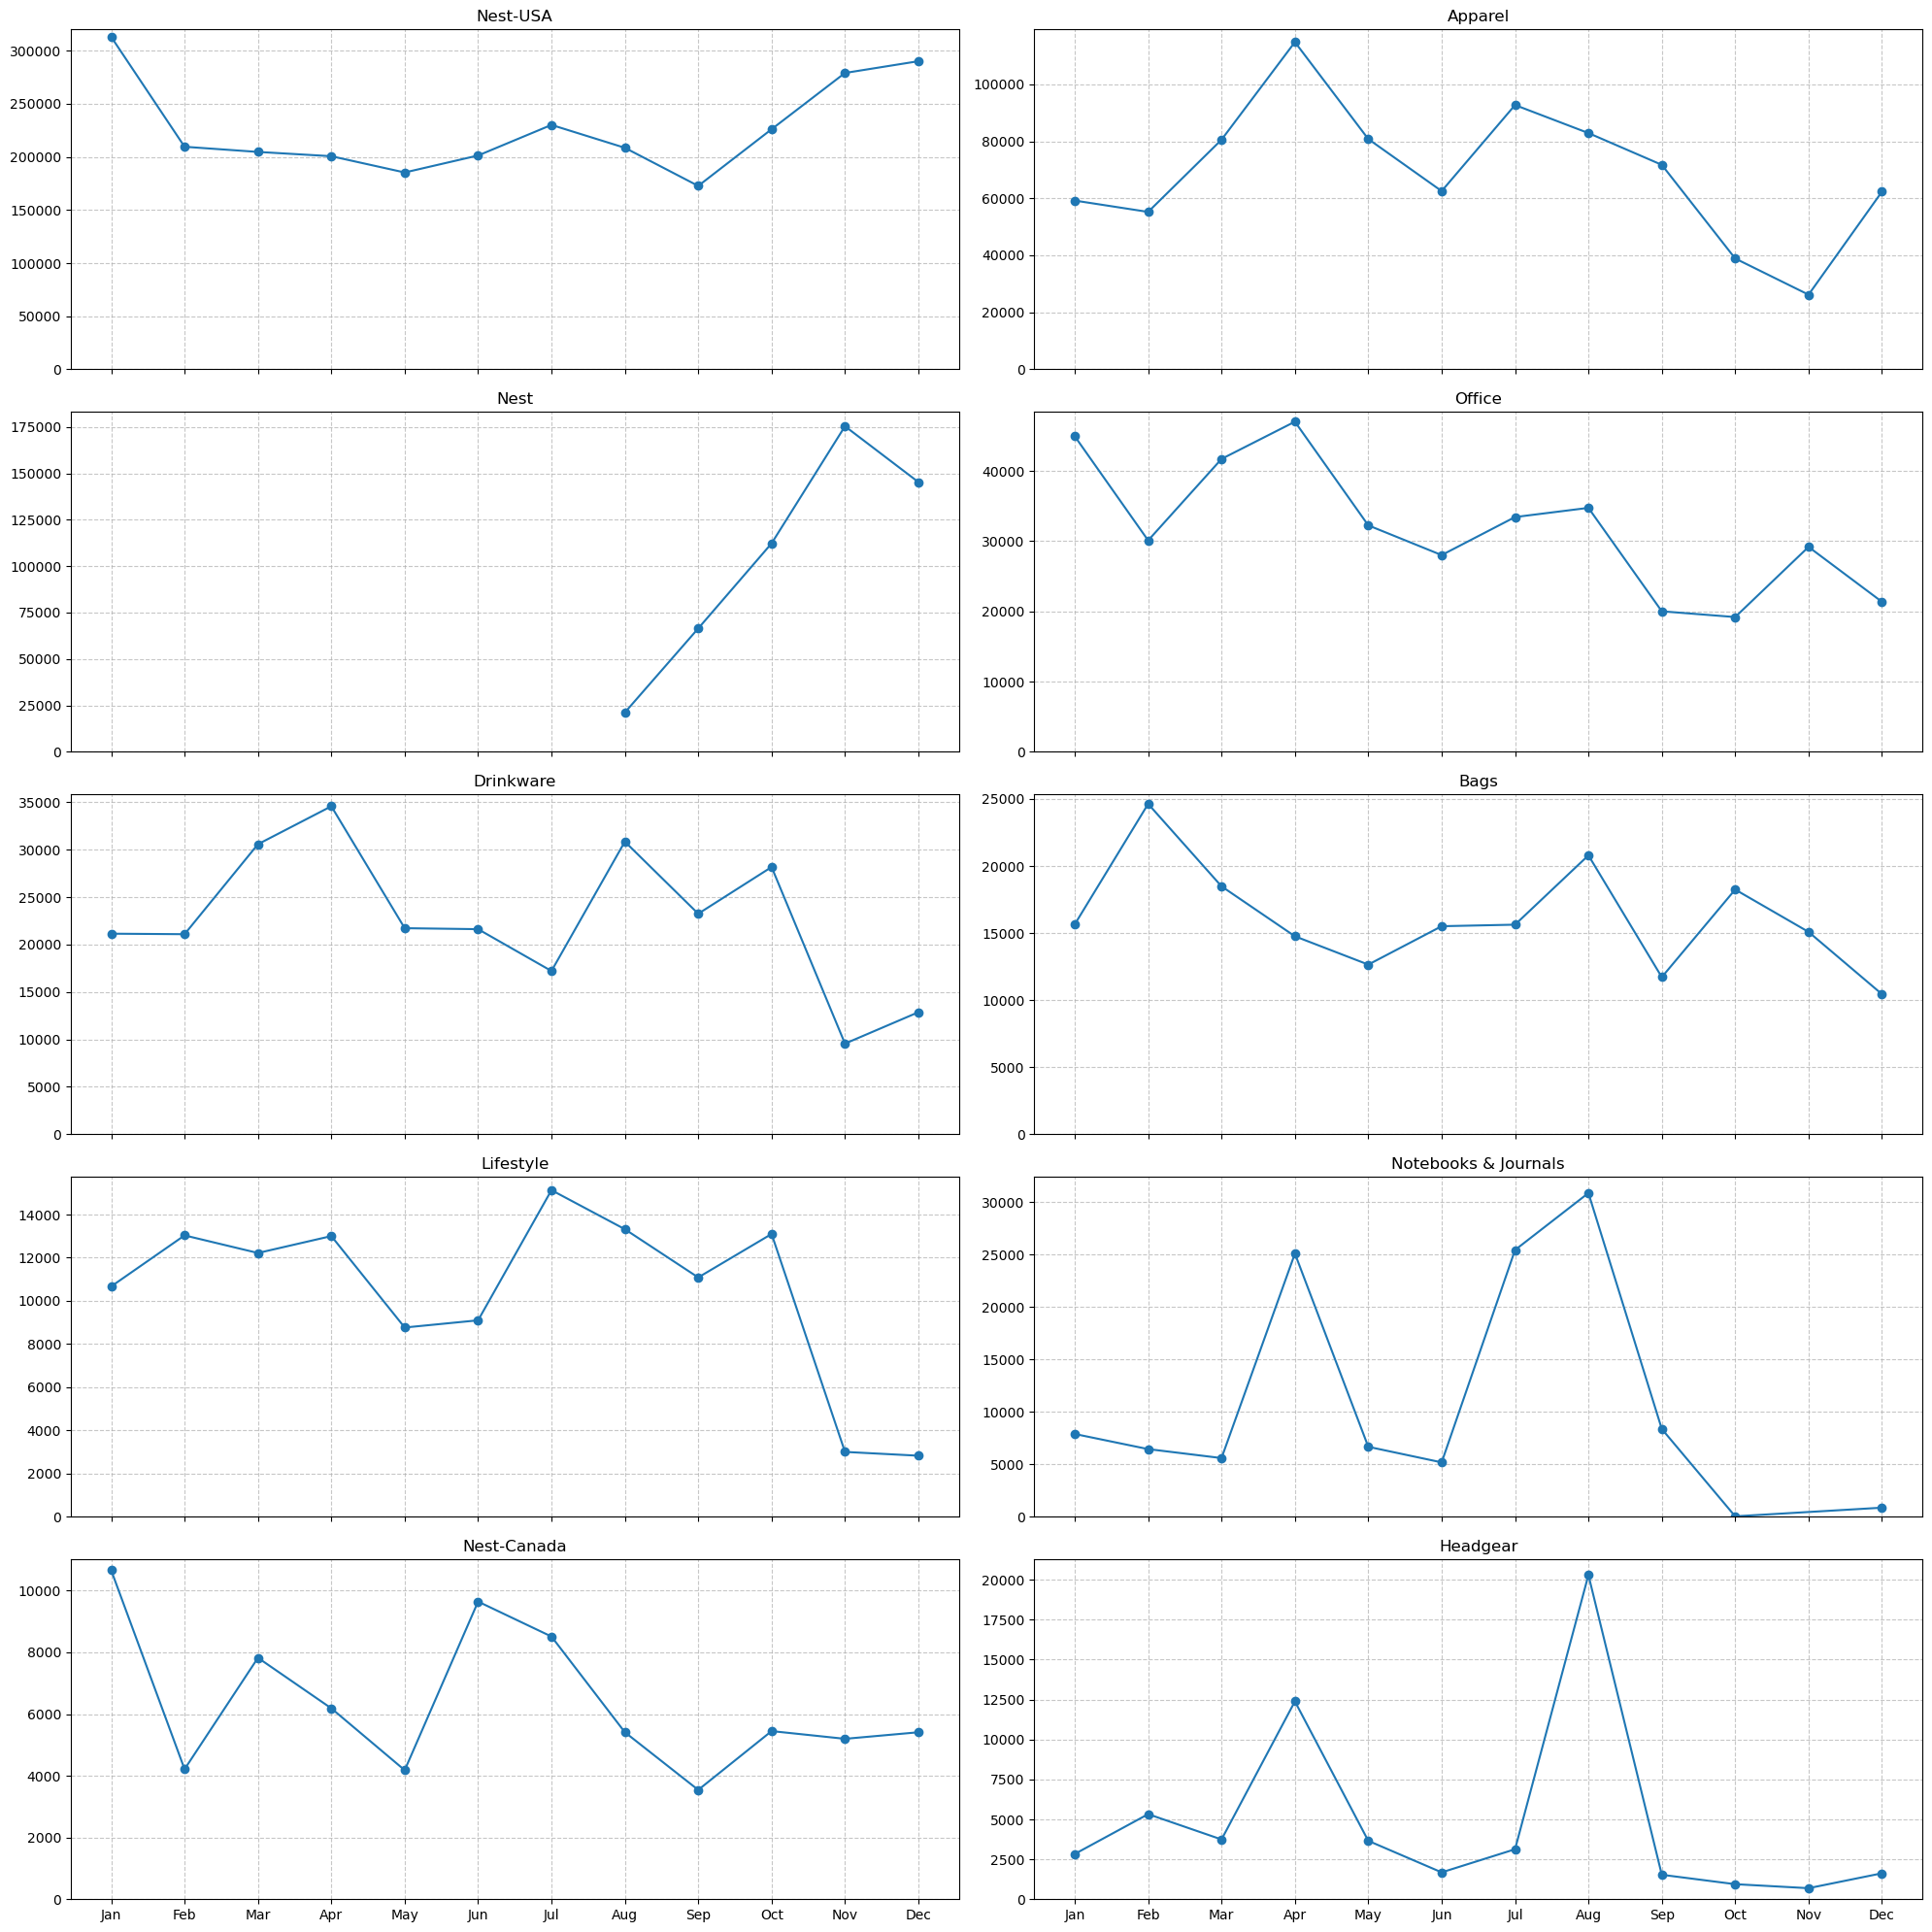

In [60]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20), sharex=True)

# Loop through each unique Product_Category and create a subplot
for i, category in enumerate(top10['Product_Category'].unique()[:10]):  # Using top10, as it has Product Categories sorted by Revenue
    ax = axes.flatten()[i]
    
    # Filter data for the current Product_Category
    category_data = cat_trend[cat_trend['Product_Category'] == category]
    
    # Plot bar graph
    ax.plot(category_data['Month_Name'], category_data['Invoice_Value'], label=category, marker='o')
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Customize subplot
    ax.set_title(category)
    
plt.tight_layout()
plt.show()

##### Sales by Location

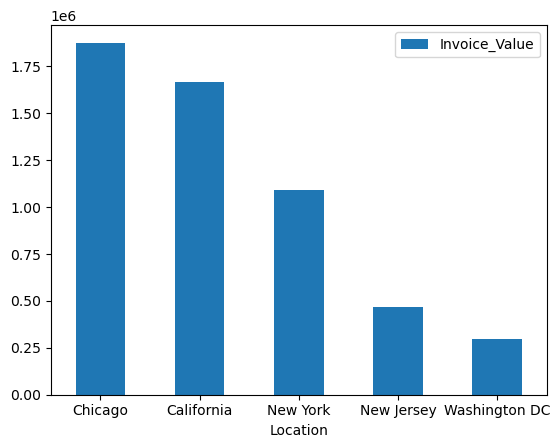

In [61]:
loc_rev = invoice.groupby('Location')['Invoice_Value'].sum().round(2).sort_values(ascending=False).reset_index()
loc_rev.plot(kind='bar', x='Location')
plt.xticks(rotation=0)
plt.show()

##### Sales of Location by Month

In [62]:
loc_rev

,Location,Invoice_Value
0,Chicago,1876541.13
1,California,1668590.41
2,New York,1089541.84
3,New Jersey,467752.76
4,Washington DC,294932.60


In [63]:
loc_trend = (invoice.groupby(['Location',invoice.Transaction_Date.dt.month,invoice.Month])['Invoice_Value'].sum()
             .reset_index()
             .rename(columns={'Month':'Month_Name','Transaction_Date':'Month'})
             .sort_values(by=['Location','Month','Invoice_Value'], ascending=[True,True,False])
            )

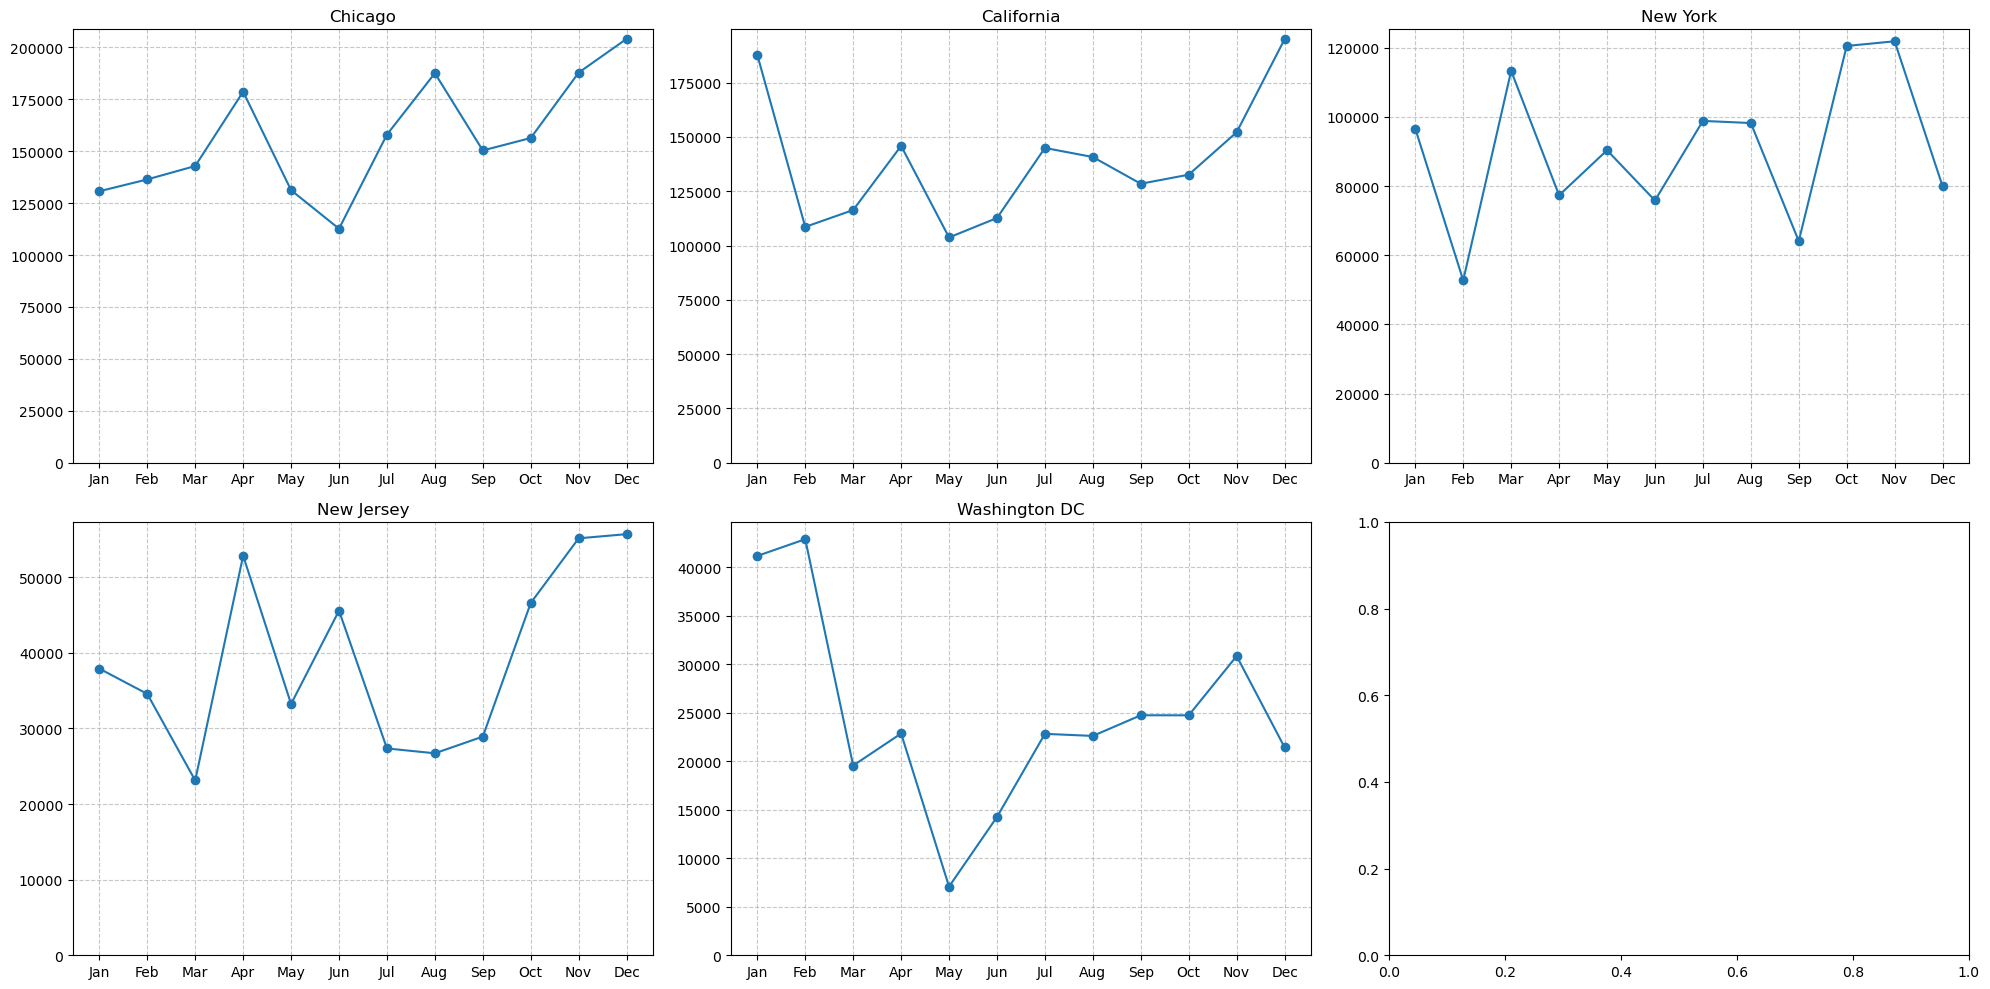

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, loc in enumerate(loc_rev['Location'].unique()[:5]):
    ax = axes.flatten()[i]
    
    category_data = loc_trend[loc_trend['Location'] == loc]
    
    ax.plot(category_data['Month_Name'], category_data['Invoice_Value'], label=category, marker='o')
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.grid(True, linestyle='--', alpha=0.7)
    
    ax.set_title(loc)
    
plt.tight_layout()
plt.show()

### g. Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [65]:
spend

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [66]:
month_spend = spend.groupby(spend.Date.dt.month)[['Offline_Spend','Online_Spend']].sum().reset_index().rename(columns={'Date':'Month'})
month_spend

,Month,Offline_Spend,Online_Spend
0,1,96600,58328.95
1,2,81300,55807.92
2,3,73500,48750.09
3,4,96000,61026.83
4,5,65500,52759.64
5,6,80500,53818.14
6,7,67500,52717.85
7,8,85500,57404.15
8,9,83000,52514.54
9,10,93500,57724.65


In [67]:
month_rev = invoice.groupby([invoice.Transaction_Date.dt.month, 'Month'])[['Invoice_Value','Delivery_Charges']].sum().round(2).reset_index().rename(columns={'Month':'Month_Name','Transaction_Date':'Month'})
month_rev

,Month,Month_Name,Invoice_Value,Delivery_Charges
0,1,Jan,494090.55,59242.32
1,2,Feb,375162.05,49216.60
2,3,Mar,415157.79,60799.94
3,4,Apr,477498.59,41481.74
4,5,May,365596.03,41396.17
5,6,Jun,361000.17,37513.58
6,7,Jul,451878.41,48723.93
7,8,Aug,475796.88,61099.57
8,9,Sep,396510.49,41005.42
9,10,Oct,480767.37,45961.88


In [68]:
rev_spend = pd.merge(left=month_rev, right=month_spend, on='Month')
rev_spend['Total_Mark_Spend'] = rev_spend['Offline_Spend'] + rev_spend['Online_Spend']
rev_spend['Market_Spend_Percent'] = (rev_spend['Total_Mark_Spend']/rev_spend['Invoice_Value']*100).round(1)
rev_spend['Delivery_Spend_Percent'] = (rev_spend['Delivery_Charges']/rev_spend['Invoice_Value']*100).round(1)
rev_spend

,Month,Month_Name,Invoice_Value,Delivery_Charges,Offline_Spend,Online_Spend,Total_Mark_Spend,Market_Spend_Percent,Delivery_Spend_Percent
0,1,Jan,494090.55,59242.32,96600,58328.95,154928.95,31.4,12.0
1,2,Feb,375162.05,49216.60,81300,55807.92,137107.92,36.5,13.1
2,3,Mar,415157.79,60799.94,73500,48750.09,122250.09,29.4,14.6
3,4,Apr,477498.59,41481.74,96000,61026.83,157026.83,32.9,8.7
4,5,May,365596.03,41396.17,65500,52759.64,118259.64,32.3,11.3
5,6,Jun,361000.17,37513.58,80500,53818.14,134318.14,37.2,10.4
6,7,Jul,451878.41,48723.93,67500,52717.85,120217.85,26.6,10.8
7,8,Aug,475796.88,61099.57,85500,57404.15,142904.15,30.0,12.8
8,9,Sep,396510.49,41005.42,83000,52514.54,135514.54,34.2,10.3
9,10,Oct,480767.37,45961.88,93500,57724.65,151224.65,31.5,9.6


### h. How marketing spend is impacting on revenue?

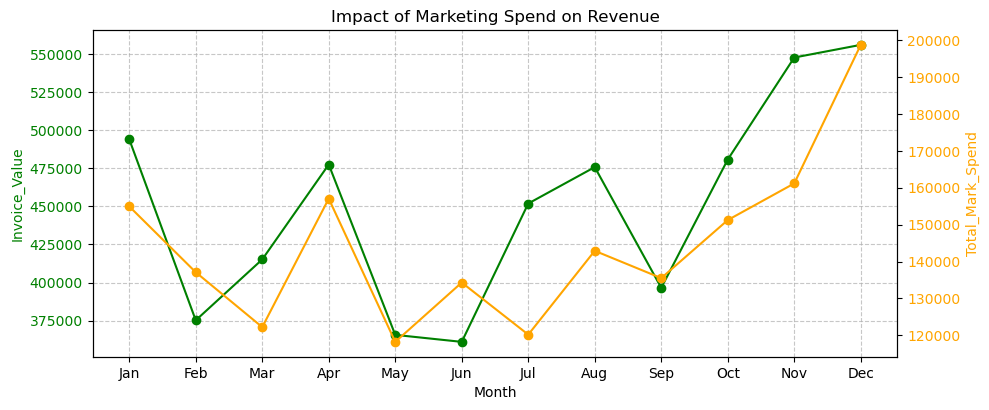

In [69]:
#rev_spend['Month'] = rev_spend['Month'].astype('str')

fig, ax1 = plt.subplots(figsize=(10,4))

ax1.set_xlabel('Month')
ax1.set_ylabel('Invoice_Value', color='green')
ax1.plot(rev_spend['Month_Name'], rev_spend['Invoice_Value'], color='green', marker='o')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True, linestyle='--', alpha=0.7)

ax2 = ax1.twinx()  
ax2.set_ylabel('Total_Mark_Spend', color='orange')  
ax2.plot(rev_spend['Month_Name'], rev_spend['Total_Mark_Spend'], color='orange', marker='o')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()  
plt.title('Impact of Marketing Spend on Revenue')
plt.show()

##### Observation

Revenue appears to be dependent on the marketing spend. It increases/decreases with the increase/decrease in marketing spend

##### Quantifying Correlation

In [70]:
correlation = rev_spend['Total_Mark_Spend'].corr(rev_spend['Invoice_Value'])

print(f'Market_Spend and Invoice Correlation %: {(correlation*100).round(1)}')

Market_Spend and Invoice Correlation %: 79.6


### i. Which product appeared frequently in the transactions?

In [71]:
(invoice.groupby(['Product_SKU','Product_Description','Product_Category'])['Transaction_ID'].count()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'Transaction_ID':'Count'})
 .head(1)
)

,Product_SKU,Product_Description,Product_Category,Count
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,3511


### j. Which product was purchased mostly based on the quantity?

In [72]:
(invoice.groupby(['Product_SKU','Product_Description','Product_Category'])['Quantity'].sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'Transaction_ID':'Count'})
 .head(1)
)

,Product_SKU,Product_Description,Product_Category,Quantity
0,GGOEGGOA017399,Maze Pen,Office,16234


# 3. Performing Customer Segmentation

### a. Using Heuristic Segmentation (Value based on RFM)

In [73]:
invoice

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,10.0,0.10,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,10.0,0.10,158.6729
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,Jan,M,Chicago,12,ELEC10,10.0,0.10,276.5940
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,Jan,M,Chicago,12,ELEC10,10.0,0.10,96.1500
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,Jan,M,Chicago,12,ELEC10,10.0,0.10,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14159,27255,2019-05-04,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,5,17.59,18.12,Clicked,May,F,California,13,NoCode,0.0,0.18,121.9010
52920,14577,27280,2019-05-04,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,6.00,Not Used,May,M,California,36,NoCode,0.0,0.18,26.7562
52921,17890,28366,2019-05-19,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,21.99,6.00,Used,May,F,Chicago,27,NoCode,0.0,0.18,31.9482
52922,16442,28662,2019-05-22,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,51.99,Used,May,F,New York,46,NoCode,0.0,0.18,72.7462


In [221]:
cust_segment = invoice.groupby('CustomerID')['Transaction_Date'].max().reset_index().rename(columns = {'Transaction_Date':'Recent_Date'})
today = pd.to_datetime('2020-01-01')
cust_segment['Recency'] = (today - cust_segment['Recent_Date']).dt.days
cust_segment.head()

,CustomerID,Recent_Date,Recency
0,12346,2019-09-15,108
1,12347,2019-11-02,60
2,12348,2019-10-19,74
3,12350,2019-12-14,18
4,12356,2019-09-15,108


In [222]:
# Alternate method
today = pd.to_datetime('2020-01-01')

cust_segment = (invoice.groupby('CustomerID')
                .apply(lambda x: pd.Series({'Recency': (today - x['Transaction_Date'].max()).days,
                                            'Frequency': x['Transaction_ID'].count(),
                                            'Monetary': x['Invoice_Value'].sum()}))
                .reset_index())
cust_segment.Monetary = cust_segment['Monetary'].round(2)
cust_segment.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,108.0,2.0,174.98
1,12347,60.0,60.0,15686.84
2,12348,74.0,23.0,1689.56
3,12350,18.0,17.0,1467.44
4,12356,108.0,36.0,2007.43


In [223]:
# Alternate method

today = pd.to_datetime('2020-01-01')

cust_segment = (invoice.groupby('CustomerID').agg({'Transaction_Date': lambda x: (today - x.max()).days,
                                                  'Transaction_ID': 'count',
                                                  'Invoice_Value': 'sum'})
                .reset_index()
                .rename(columns={'Transaction_Date': 'Recency','Transaction_ID': 'Frequency','Invoice_Value': 'Monetary'}))

cust_segment.Monetary = cust_segment['Monetary'].round(2)
cust_segment.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,108,2,174.98
1,12347,60,60,15686.84
2,12348,74,23,1689.56
3,12350,18,17,1467.44
4,12356,108,36,2007.43


In [227]:
cust_segment['R'] = pd.cut(cust_segment.Recency, bins=[0,91,182,273,370], labels=range(4,0,-1)).astype('int')     # Providing higher score to lower value
cust_segment['F'] = pd.qcut(cust_segment.Frequency, 4, labels=range(1,5)).astype('int')                           # changing dtypes from categorical to int
cust_segment['M'] = pd.qcut(cust_segment.Monetary, 4, labels=range(1,5)).astype('int')

In [228]:
cust_segment['RFM_Total'] = cust_segment.R + cust_segment.F + cust_segment.M
cust_segment.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Total,Heuristic_Segment
0,12346,108,2,174.98,3,1,1,5,Standard
1,12347,60,60,15686.84,4,4,4,12,Gold
2,12348,74,23,1689.56,4,3,2,9,Silver
3,12350,18,17,1467.44,4,2,2,8,Standard
4,12356,108,36,2007.43,3,3,2,8,Silver


In [229]:
cust_segment['Heuristic_Segment'] = pd.qcut(cust_segment.RFM_Total, 4, labels=['Standard','Silver','Gold','Platinum'])
cust_segment.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Total,Heuristic_Segment
0,12346,108,2,174.98,3,1,1,5,Standard
1,12347,60,60,15686.84,4,4,4,12,Platinum
2,12348,74,23,1689.56,4,3,2,9,Gold
3,12350,18,17,1467.44,4,2,2,8,Silver
4,12356,108,36,2007.43,3,3,2,8,Silver


### b. Using K-Means algorithm

##### Feature Selection

In [230]:
cust_segment.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Total,Heuristic_Segment
0,12346,108,2,174.98,3,1,1,5,Standard
1,12347,60,60,15686.84,4,4,4,12,Platinum
2,12348,74,23,1689.56,4,3,2,9,Gold
3,12350,18,17,1467.44,4,2,2,8,Silver
4,12356,108,36,2007.43,3,3,2,8,Silver


In [231]:
cust_segment.iloc[:,[1,2,3]].describe()

,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000
mean,145.292234,36.051771,3676.674952
std,101.936959,50.885680,5846.082157
min,1.000000,1.000000,6.990000
25%,56.000000,10.000000,783.972500
50%,132.000000,21.000000,2011.620000
75%,221.000000,46.000000,4495.057500
max,365.000000,695.000000,87200.900000


In [232]:
cust_segment.iloc[:,[1,2,3]].corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.199993,-0.200305
Frequency,-0.199993,1.000000,0.945739
Monetary,-0.200305,0.945739,1.000000


In [233]:
# Dropping CustomerID & Frequency for features

X = cust_segment.iloc[:,[1,2,3]]
X

,Recency,Frequency,Monetary
0,108,2,174.98
1,60,60,15686.84
2,74,23,1689.56
3,18,17,1467.44
4,108,36,2007.43
...,...,...,...
1463,271,7,860.69
1464,88,40,3016.54
1465,195,8,166.91
1466,70,1,333.80


##### Modelling K-Means Algorithm

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

ss = StandardScaler()
scaled_array = ss.fit_transform(X)

k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
cust_segment['Kmean_Segment'] = kmeans.fit_predict(scaled_array)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [235]:
cust_segment.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Total,Heuristic_Segment,Kmean_Segment
0,12346,108,2,174.98,3,1,1,5,Standard,0
1,12347,60,60,15686.84,4,4,4,12,Platinum,3
2,12348,74,23,1689.56,4,3,2,9,Gold,0
3,12350,18,17,1467.44,4,2,2,8,Silver,0
4,12356,108,36,2007.43,3,3,2,8,Silver,0


In [236]:
cust_segment['Kmeans_Segment_Label'] = np.select([cust_segment['Kmean_Segment'] == 0,
                                                  cust_segment['Kmean_Segment'] == 1,
                                                  cust_segment['Kmean_Segment'] == 2],
                                                 ['Standard', 'Silver', 'Gold'],
                                                 default='Platinum')
cust_segment.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Total,Heuristic_Segment,Kmean_Segment,Kmeans_Segment_Label
0,12346,108,2,174.98,3,1,1,5,Standard,0,Standard
1,12347,60,60,15686.84,4,4,4,12,Platinum,3,Platinum
2,12348,74,23,1689.56,4,3,2,9,Gold,0,Standard
3,12350,18,17,1467.44,4,2,2,8,Silver,0,Standard
4,12356,108,36,2007.43,3,3,2,8,Silver,0,Standard


In [237]:
cust_segment.Heuristic_Segment.value_counts()

Standard    515
Gold        335
Silver      322
Platinum    296
Name: Heuristic_Segment, dtype: int64

In [238]:
cust_segment.Kmeans_Segment_Label.value_counts()

Standard    759
Silver      551
Platinum    153
Gold          5
Name: Kmeans_Segment_Label, dtype: int64

# 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

##### First, define a dependent variable with categories low value, medium value, high value using customer revenue Then perform a Classification model

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [241]:
pd.qcut(cust_segment['Monetary'], 3, labels=['Low Value', 'Medium Value', 'High Value'])

0          Low Value
1         High Value
2       Medium Value
3       Medium Value
4       Medium Value
            ...     
1463       Low Value
1464    Medium Value
1465       Low Value
1466       Low Value
1467      High Value
Name: Monetary, Length: 1468, dtype: category
Categories (3, object): ['Low Value' < 'Medium Value' < 'High Value']

In [242]:
cust_segment['Value_Category'] = pd.qcut(cust_segment['Monetary'], 3, labels=['Low Value', 'Medium Value', 'High Value'])

# Select features and target variable
X = cust_segment[['Monetary']]
y = cust_segment['Value_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report)

Accuracy: 1.0
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        98
   Low Value       1.00      1.00      1.00        94
Medium Value       1.00      1.00      1.00       102

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



# 5. Cross-Selling (Which products are selling together)

##### Performing Market Basket Analysis

In [97]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 18.5 MB/s eta 0:00:00


In [99]:
from mlxtend.frequent_patterns import apriori, association_rules

In [100]:
invoice

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,10.0,0.10,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,ELEC10,10.0,0.10,158.6729
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,Jan,M,Chicago,12,ELEC10,10.0,0.10,276.5940
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,Jan,M,Chicago,12,ELEC10,10.0,0.10,96.1500
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,Jan,M,Chicago,12,ELEC10,10.0,0.10,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14159,27255,2019-05-04,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,5,17.59,18.12,Clicked,May,F,California,13,NoCode,0.0,0.18,121.9010
52920,14577,27280,2019-05-04,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,6.00,Not Used,May,M,California,36,NoCode,0.0,0.18,26.7562
52921,17890,28366,2019-05-19,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,21.99,6.00,Used,May,F,Chicago,27,NoCode,0.0,0.18,31.9482
52922,16442,28662,2019-05-22,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,51.99,Used,May,F,New York,46,NoCode,0.0,0.18,72.7462


In [153]:
basket = invoice.groupby(['Transaction_ID','Product_Description'])['Quantity'].count().unstack().fillna(0)
basket[basket>0] = 1
basket

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
invoice.groupby(['Product_SKU','Product_Description'])['Quantity'].count().reset_index()

,Product_SKU,Product_Description,Quantity
0,GGOEA0CH077599,Android Hard Cover Journal,16
1,GGOEAAAB034813,Android BTTF Cosmos Graphic Tee,18
2,GGOEAAAB034814,Android BTTF Cosmos Graphic Tee,43
3,GGOEAAAB034815,Android BTTF Cosmos Graphic Tee,31
4,GGOEAAAB034816,Android BTTF Cosmos Graphic Tee,22
...,...,...,...
1140,GGOEYOCR077399,YouTube RFID Journal,24
1141,GGOEYOCR077799,YouTube Hard Cover Journal,61
1142,GGOEYOCR078099,YouTube Spiral Journal with Pen,33
1143,GGOEYOLR018699,YouTube Leatherette Notebook Combo,126


In [122]:
invoice.Product_Description.nunique()

404

In [167]:
freq_itemsets = apriori(basket, min_support=0.01, use_colnames=True)      # can control minimum support needed
freq_itemsets

C:\Users\singh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.016280,(26 oz Double Wall Insulated Bottle)
1,0.010295,(8 pc Android Sticker Sheet)
2,0.013886,(BLM Sweatshirt)
3,0.010175,(Badge Holder)
4,0.011173,(Ballpoint LED Light Pen)
5,0.011652,(Foam Can and Bottle Cooler)
6,0.012928,(Four Color Retractable Pen)
7,0.027293,(Google 22 oz Water Bottle)
8,0.010534,(Google Blackout Cap)
9,0.012769,(Google Doodle Decal)


In [169]:
rules = association_rules(freq_itemsets, metric='lift', min_threshold=1)         # can control minimum lift needed
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.128886,0.132796,0.027653,0.214551,1.615644,0.010537,1.104087,0.437430
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.132796,0.128886,0.027653,0.208233,1.615644,0.010537,1.100216,0.439403


# 6. Predicting Next Purchase Day

##### How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

In [243]:
cust_segment

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Total,Heuristic_Segment,Kmean_Segment,Kmeans_Segment_Label,Value_Category
0,12346,108,2,174.98,3,1,1,5,Standard,0,Standard,Low Value
1,12347,60,60,15686.84,4,4,4,12,Platinum,3,Platinum,High Value
2,12348,74,23,1689.56,4,3,2,9,Gold,0,Standard,Medium Value
3,12350,18,17,1467.44,4,2,2,8,Silver,0,Standard,Medium Value
4,12356,108,36,2007.43,3,3,2,8,Silver,0,Standard,Medium Value
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,271,7,860.69,2,1,2,5,Standard,1,Silver,Low Value
1464,18260,88,40,3016.54,4,3,3,10,Gold,0,Standard,Medium Value
1465,18269,195,8,166.91,2,1,1,4,Standard,1,Silver,Low Value
1466,18277,70,1,333.80,4,1,1,6,Standard,0,Standard,Low Value


In [244]:
cust_data = (invoice.groupby(['CustomerID', 'Transaction_Date'])['Transaction_ID'].count()
             .reset_index()
             .iloc[:,[0,1]])
cust_data.head()

,CustomerID,Transaction_Date
0,12346,2019-09-15
1,12347,2019-03-24
2,12347,2019-11-01
3,12347,2019-11-02
4,12348,2019-06-22


In [245]:
duplicated_cust = cust_data['CustomerID'][cust_data.CustomerID.duplicated()]
repeat_cust_data = cust_data[cust_data['CustomerID'].isin(duplicated_cust)]
repeat_cust_data.head()

,CustomerID,Transaction_Date
1,12347,2019-03-24
2,12347,2019-11-01
3,12347,2019-11-02
4,12348,2019-06-22
5,12348,2019-10-19


In [246]:
repeat_avg = (repeat_cust_data.groupby('CustomerID')['Transaction_Date']
              .apply(lambda x: x.diff().mean().days)
              .reset_index()
              .rename(columns={'Transaction_Date':'Avg_Days'}))

repeat_avg['Next_Purchase_Cat'] = pd.cut(repeat_avg['Avg_Days'],
                                         bins=[-1, 30, 60, 90, float('inf')],
                                         labels=['0-30 days', '30-60 days', '60-90 days', '90+ days'])

repeat_avg.head()

,CustomerID,Avg_Days,Next_Purchase_Cat
0,12347,111,90+ days
1,12348,119,90+ days
2,12370,30,0-30 days
3,12377,139,90+ days
4,12383,24,0-30 days


In [247]:
avg_repeat_data = pd.merge(repeat_avg, cust_segment, on = 'CustomerID')
avg_repeat_data

,CustomerID,Avg_Days,Next_Purchase_Cat,Recency,Frequency,Monetary,R,F,M,RFM_Total,Heuristic_Segment,Kmean_Segment,Kmeans_Segment_Label,Value_Category
0,12347,111,90+ days,60,60,15686.84,4,4,4,12,Platinum,3,Platinum,High Value
1,12348,119,90+ days,74,23,1689.56,4,3,2,9,Gold,0,Standard,Medium Value
2,12370,30,0-30 days,190,91,8059.28,2,4,4,10,Gold,3,Platinum,High Value
3,12377,139,90+ days,41,77,11244.90,4,4,4,12,Platinum,3,Platinum,High Value
4,12383,24,0-30 days,100,69,5865.10,3,4,4,11,Platinum,0,Standard,High Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,18239,150,90+ days,35,52,6928.03,4,4,4,12,Platinum,0,Standard,High Value
730,18245,73,60-90 days,34,55,8420.29,4,4,4,12,Platinum,0,Standard,High Value
731,18260,52,30-60 days,88,40,3016.54,4,3,3,10,Gold,0,Standard,Medium Value
732,18269,76,60-90 days,195,8,166.91,2,1,1,4,Standard,1,Silver,Low Value


In [253]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

avg_repeat_data['Heuristic_Segment'] = le.fit_transform(avg_repeat_data['Heuristic_Segment'])
avg_repeat_data['Kmeans_Segment_Label'] = le.fit_transform(avg_repeat_data['Kmeans_Segment_Label'])
avg_repeat_data['Value_Category'] = le.fit_transform(avg_repeat_data['Value_Category'])

# Split the dataset into features and target variable
X = avg_repeat_data.drop(['Next_Purchase_Cat'], axis=1)  # Features
y = avg_repeat_data['Next_Purchase_Cat']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


# Perform cohort analysis

In [255]:
unique

,Year_Month,Month,CustomerID,cust_count,new_cust,existing_cust,new_cust_%,existing_cust_%,new_cust_rev,existing_cust_rev
0,2019-01,Jan,"[17850, 13047, 12583, 15100, 14688, 15311, 160...",215,215.0,0.0,100.0,0.0,1227511.26,-0.00
1,2019-02,Feb,"[17809, 15311, 14527, 13767, 12748, 14911, 178...",109,96.0,13.0,88.1,11.9,636073.09,414708.98
2,2019-03,Mar,"[15100, 17511, 17920, 16210, 17897, 12748, 169...",208,177.0,31.0,85.1,14.9,769307.02,480904.08
3,2019-04,Apr,"[15311, 14527, 15513, 15983, 17377, 12748, 124...",224,163.0,61.0,72.8,27.2,523464.52,673996.97
4,2019-05,May,"[15311, 13408, 13448, 15983, 12748, 17841, 146...",200,112.0,88.0,56.0,44.0,386306.89,938120.56
5,2019-06,Jun,"[15100, 14527, 16029, 12431, 17511, 13408, 137...",259,137.0,122.0,52.9,47.1,332681.57,1043856.52
6,2019-07,Jul,"[15311, 14527, 17511, 13408, 13694, 17951, 127...",236,94.0,142.0,39.8,60.2,277810.47,1317146.16
7,2019-08,Aug,"[12583, 15291, 15311, 13767, 18085, 13758, 136...",300,135.0,165.0,45.0,55.0,302180.10,1232943.06
8,2019-09,Sep,"[14688, 15311, 14527, 16029, 14307, 12748, 149...",193,78.0,115.0,40.4,59.6,168107.79,1106354.61
9,2019-10,Oct,"[15311, 14527, 16029, 13408, 14849, 14911, 178...",210,87.0,123.0,41.4,58.6,270950.23,1000490.01


In [260]:
unique.columns

Index(['Year_Month', 'Month', 'CustomerID', 'cust_count', 'new_cust',
       'existing_cust', 'new_cust_%', 'existing_cust_%', 'new_cust_rev',
       'existing_cust_rev'],
      dtype='object')

In [261]:
cohort = unique.loc[:,['Month','new_cust', 'existing_cust', 'new_cust_%', 'existing_cust_%', 'new_cust_rev', 'existing_cust_rev']]
cohort

,Month,new_cust,existing_cust,new_cust_%,existing_cust_%,new_cust_rev,existing_cust_rev
0,Jan,215.0,0.0,100.0,0.0,1227511.26,-0.00
1,Feb,96.0,13.0,88.1,11.9,636073.09,414708.98
2,Mar,177.0,31.0,85.1,14.9,769307.02,480904.08
3,Apr,163.0,61.0,72.8,27.2,523464.52,673996.97
4,May,112.0,88.0,56.0,44.0,386306.89,938120.56
5,Jun,137.0,122.0,52.9,47.1,332681.57,1043856.52
6,Jul,94.0,142.0,39.8,60.2,277810.47,1317146.16
7,Aug,135.0,165.0,45.0,55.0,302180.10,1232943.06
8,Sep,78.0,115.0,40.4,59.6,168107.79,1106354.61
9,Oct,87.0,123.0,41.4,58.6,270950.23,1000490.01


### Customers who started in each month and understand their behaviour

In [262]:
cohort.loc[:,['Month','new_cust','new_cust_rev']]

,Month,new_cust,new_cust_rev
0,Jan,215.0,1227511.26
1,Feb,96.0,636073.09
2,Mar,177.0,769307.02
3,Apr,163.0,523464.52
4,May,112.0,386306.89
5,Jun,137.0,332681.57
6,Jul,94.0,277810.47
7,Aug,135.0,302180.10
8,Sep,78.0,168107.79
9,Oct,87.0,270950.23


### Which Month cohort has maximum retention?

In [279]:
 month = cohort.loc[:,['Month','existing_cust_%']].sort_values(by='existing_cust_%', ascending = False).iloc[0][0]

print(f' Month with max cohort retention : {month}')

 Month with max cohort retention : Nov
